# Credit Card Approval

## Table of contents
---------------------------------------------
-  Import CPU Python Libraries 
-  Function Helper
-  Import Dataset & Data Description
-  Data Understanding
-  Select the Featurs
-  Data Pre-Processing
-  Exploratory Data Analysis
-  Data Transformation
-  Feature Selection
-  Feature Engineering 
-  Statistics
-  Resampling Data
-  Data Splitting 
-  Machine Learning Models 
-  Machine Learning Optimization
-  Accuracy Score Summary 
---------------------------------------------

# 01. Import CPU Python Libraries

In [226]:
import pandas as pd
import numpy as np 
np.iinfo(np.uint64).max

import matplotlib.pyplot as plt
import plotly.express as px
from termcolor import colored 
import seaborn as sns  
from tabulate import tabulate

# Importing plotly and cufflinks in offline mode
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Feature Engineering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()
le_orig = LabelEncoder()
ohe = OneHotEncoder()

# Data Transformation 
from sklearn.preprocessing import StandardScaler

# Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector

# Import Resampling Library
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from imblearn.over_sampling import SVMSMOTE
from imblearn.pipeline import Pipeline

# Data Splitting 
from sklearn.model_selection import train_test_split

# Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector

# sklearn Classifiers Evaluation libraries
from sklearn.metrics import classification_report # To get classification report
from sklearn.metrics import confusion_matrix # To get the confusion matrix
from sklearn.metrics import accuracy_score # To get the accuracy score 

# sklearn Regressor Evaluation libraries
from sklearn.metrics import explained_variance_score


# Supervised Machine Learning Models

## Random Forest Classifiers
from sklearn.ensemble import RandomForestClassifier

## Gradient Boosting Classifier 
from sklearn.ensemble import GradientBoostingClassifier
## Histogram-based Gradient Boosting Classification Tree
from sklearn.ensemble import HistGradientBoostingClassifier
## AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

## Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

## K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

## Naive Bayes Classifiers
from sklearn.naive_bayes import GaussianNB # DV
## Naive Bayes classifier for multivariate Bernoulli models
from sklearn.naive_bayes import BernoulliNB # 2 | 3 DV


## Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

## Logistic Regression Classifiers
from sklearn.linear_model import LogisticRegression
## Logistic Regression CV classifier
from sklearn.linear_model import LogisticRegressionCV
## Linear classifiers with stochastic gradient descent SGD training.
from sklearn.linear_model import SGDClassifier
## Linear Perceptron Classifier
from sklearn.linear_model import Perceptron

## XGBoost Classifiers
from xgboost import XGBClassifier

## Support Vector Machines Classifiers
from sklearn.svm import SVC
## Linear Support Vector Classification
from sklearn.svm import LinearSVC

## Multilayer Perceptron Classifier
from sklearn.neural_network import MLPClassifier

# Model Optmization
from sklearn.model_selection import RandomizedSearchCV

# 02. Function Helper

In [227]:
'''
Drop Varibales
'''
def DropVariables(dfDrop, col):
      dfDrop = dfDrop.drop(col, axis=1)

      return dfDrop

'''
Convert Data Type
'''
def Convert_Data_Typt_to_str(Con_df_str, col):
      for colu in col :
            Con_df_str[colu] = Con_df_str[colu].apply(str)
            print ('\nData Type Changed to Objective for Variable: [', colu , '] Data type now is: ' , Con_df_str[colu].dtype)

      return Con_df_str
 
'''
Missong Value Information
'''
def missing_values(df_missing_value_per):
      missing_number = df_missing_value_per.isnull().sum().sort_values(ascending=False)
      missing_percent = (df_missing_value_per.isnull().sum()/df_missing_value_per.shape[0]).sort_values(ascending=False) 
      missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])

      return missing_values[missing_values['Missing_Number']>=0]

def missing_values_info(df_missing_value):
      print(colored(f"Missing Values for Catuogirical Dataset:\n", attrs=['bold']), missing_values(df_missing_value),'\n',  
            colored('-'*79, 'red', attrs=['bold']), sep='')

def SelectRowsHavingMissing_Value(df_Missing_Rows):
      null_data = df_Missing_Rows[df_Missing_Rows.isnull().any(axis=1)]
      
      return null_data
            
def replace_0_by_NA(df_replace, col_0_to_NA):
      df_replace[col_0_to_NA] = df_replace[col_0_to_NA].replace(0, np.nan)

      return df_replace

'''
Split the Dataset Variables to Obj and Num
'''
def Data_Splitting_Num_Obj(df_split):
      Obj = df_split.select_dtypes(include = ['object'])
      Num = df_split.select_dtypes(include = np.number) 

      return Obj, Num

'''
Exploratory Data Analysis (EDA)
'''
def EDA_target(df_EDA,target):
      if df_EDA[target].dtype=='object':
            print(df_EDA[target].value_counts())
            plt.figure(figsize=(10,10))
            explode = [0.1,0.1]
            plt.pie(df_EDA[target].value_counts(), explode=explode,autopct='%1.1f%%', shadow=True,startangle=140)
            plt.title(target)
            plt.axis('off');

def obj_EDA(df_EDA, cols):
      for col in cols:
            table = pd.DataFrame(df_EDA[col].value_counts())
            print(tabulate(table, headers = 'keys', tablefmt = 'psql'))
            plt.figure(figsize = (8,5))
            df_EDA[col].value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
            plt.title(col)
            plt.show()

def EDA_obj(df_EDA, cols, Target):
      for col in cols:
            print('Variable Name: ', df_EDA[col].name)
            pd.crosstab(df_EDA[col], df_EDA[Target]).iplot(kind="bar")

def EDA_num(df_EDA, cols):
    for col in cols: 
      fig, ax = plt.subplots(figsize=(20, 10))
      df_EDA.hist(column=[col], ax=ax  )
    df_EDA[cols].plot.box( figsize=(20, 10))
    df_EDA[cols].plot(subplots=True, figsize=(20, 10))
    
def EDA_num_with_DV(df_eda, NUMcols_eda): 
    for col in NUMcols_eda:
        sns.set_style('whitegrid')
        plt.figure(figsize=(20,10))
        sns.set_context('paper', font_scale=1.5)

        sns.histplot(x=col, data = df_eda, bins = 30, hue =target,palette="Blues", kde = True).set_title(col,fontsize=20)
        plt.legend(['not satisfaction','satisfaction'],shadow = True, loc = 0);

'''
Feature Selection
'''
def Feature_selection_forward(df_forward, target):
      ## Split the df to Obj and num
      obj, num = Data_Splitting_Num_Obj(df_forward)
      list_df_num = list(num.columns)
      list_df_num.append(target)
      print('All the Num Variables:',list_df_num)
      list_df_Obj = list(obj.columns)
      print('\nAll the obj Variables:',list_df_Obj)

      # Create New DataFrame Hvae only the Num Variables
      df_num = df_forward[list_df_num]

      # define dataset
      X = df_num.drop(target, axis=1)
      y = df_num[target]
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

      forward_FS = SequentialFeatureSelector(RandomForestClassifier(n_jobs= -1, ), # How many course you want to use. '-1 mwans all the course'
                                                                  k_features= (1, X.shape[1]),
                                                                  forward=True,
                                                                  floating=False,
                                                                  verbose=2,
                                                                  scoring='accuracy',
                                                                  cv= 5
                  ).fit(X_train, y_train)

      print ('Most Variables Can Effect The Target Variables:\n',forward_FS.k_feature_names_)
      print ('\nWith Highest Score:\n',forward_FS.k_score_)

      new_list_num = list(forward_FS.k_feature_names_)
      print('All the Num Variables Selected:',new_list_num)

      new_df_list = new_list_num + list_df_Obj
      df_forward = df_forward[new_df_list]

      forward_FS = pd.DataFrame(forward_FS.get_metric_dict()).T

      return df_forward, forward_FS

'''
Data Transformation
'''
def NumStandardScaler(dataframe_series):
      for col in list(dataframe_series.columns):
            if (dataframe_series[col].dtype == 'float64' or dataframe_series[col].dtype == 'int64'):
                  print ('\nStandardization Applied On:', col)
                  dataframe_series[col] = StandardScaler().fit_transform(dataframe_series[col].values.reshape(-1,1))

      return dataframe_series

'''
Feature Engineering 
'''
def AllObjLabelEncoder(dataframe_series):
      if dataframe_series.dtype=='object':
            print('\nLableEncoding Applied On:', dataframe_series.name)
            dataframe_series = LabelEncoder().fit_transform(dataframe_series)
            

      return dataframe_series
def ObjOneHotEncoder(dataframe_series, col):
      print ('\nOneHoteEncodeing Applied On:', col)
      Futuer_array = ohe.fit_transform(dataframe_series[col]).toarray()
      Futuer_lable = ohe.get_feature_names_out(col)
      Futuer_lable = np.array(Futuer_lable).ravel()
      features = pd.DataFrame(Futuer_array, columns=Futuer_lable )
      dataframe_series = dataframe_series.drop(columns=col)
      dataframe_series = pd.concat([dataframe_series , features], axis=1)
      return dataframe_series

'''
Resampling Data
'''
def resampling_by_SMOTE(x_s, y_s): 
      model = DecisionTreeClassifier()
      cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

      # define SMOTE
      smote = SMOTE() 
      # fit predictor and target variable
      x_smote, y_smote = smote.fit_resample(x_s, y_s)
      # summarize the new class distribution
      print('\nOriginal dataset shape', Counter(y_s))
      print('SMOTE Resample dataset shape', Counter(y_smote))
      # Evaluate pipeline
      scores_SMOTE = cross_val_score(model, x_smote, y_smote, scoring='roc_auc', cv=cv, n_jobs=-1)
      scores_SMOTE = mean(scores_SMOTE)
      print('SMOTE Mean ROC AUC: ', scores_SMOTE)


      # Define SMOTESVM
      oversample = SVMSMOTE()
      # fit predictor and target variable
      X_svm, y_svm = oversample.fit_resample(x_s, y_s)
      # Summarize the new class distribution
      print('\nOriginal dataset shape', Counter(y_s))
      print('SMOTE SVM Resample dataset shape', Counter(y_svm))
      # Evaluate pipeline
      scores_SVM = cross_val_score(model, X_svm, y_svm, scoring='roc_auc', cv=cv, n_jobs=-1)
      scores_SVM = mean(scores_SVM)
      print('SMOTE SVM Mean ROC AUC: ', scores_SVM)


      # Define Standerd SMOTE pipeline
      under = RandomUnderSampler()
      over = SMOTE()
      steps = [('over', over), ('u', under)]
      pipeline = Pipeline(steps=steps)
      # transform the dataset
      x_smote_pip, y_smote_pip = pipeline.fit_resample(x_s, y_s)
      # summarize the new class distribution
      print('\nOriginal dataset shape', Counter(y_s))
      print('Standerd SMOTE pipeline Resample dataset shape', Counter(y_smote_pip))
      # Evaluate pipeline
      scores_pip = cross_val_score(model, x_smote_pip, y_smote_pip, scoring='roc_auc', cv=cv, n_jobs=-1)
      scores_pip = mean(scores_pip)
      print('Standerd SMOTE pipeline Mean ROC AUC: ', scores_pip)


      # Define K neighbors SMOTE pipeline
      over = SMOTE(k_neighbors=3)
      steps = [('over', over), ('u', under)]
      pipeline = Pipeline(steps=steps)
      # transform the dataset
      x_smote_k, y_smote_k = pipeline.fit_resample(x_s, y_s)
      # summarize the new class distribution
      print('\nOriginal dataset shape', Counter(y_s))
      print('K neighbors SMOTE pipeline Resample dataset shape', Counter(y_smote_k))
      # Evaluate pipeline
      scores_pip_K = cross_val_score(model, x_smote_k, y_smote_k, scoring='roc_auc', cv=cv, n_jobs=-1)
      scores_pip_K = mean(scores_pip_K)
      print('K neighbors SMOTE pipeline Mean ROC AUC: ', scores_pip_K)


      if ( (scores_SMOTE >= scores_SVM) and (scores_SMOTE >= scores_pip) and (scores_SMOTE >= scores_pip_K) ): 
            print('\n\tThe Highest ROC Score is: ', scores_SMOTE)
            return x_smote, y_smote
      elif ( (scores_SVM >= scores_SMOTE) and (scores_SVM >= scores_pip) and (scores_SVM >= scores_pip_K) ): 
            print('\n\tThe Highest ROC Score is: ', scores_SVM)
            return X_svm, y_svm
      elif ( (scores_pip >= scores_SMOTE) and (scores_pip >= scores_SVM) and (scores_pip >= scores_pip_K) ): 
            print('\n\tThe Highest ROC Score is: ', scores_pip)
            return x_smote_pip, y_smote_pip
      elif ( (scores_pip_K >= scores_SMOTE) and (scores_pip_K >= scores_SVM) and (scores_pip_K >= scores_pip) ): 
            print('\n\tThe Highest ROC Score is: ', scores_pip_K)
            return  x_smote_k, y_smote_k
      

# 03. Import Dataset & Data Description

## Import CSV File

In [228]:
data_path = 'C:/Users/rbani/OneDrive/Desktop/My Final AI/GitHub Codes/Classification/Credit Card Approvals/clean_dataset.csv'
df = pd.read_csv(data_path)
pd.DataFrame(df.head(20))

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.830,0.000,1,1,Industrials,White,1.250,1,1,1,0,ByBirth,202,0,1
1,0,58.670,4.460,1,1,Materials,Black,3.040,1,1,6,0,ByBirth,43,560,1
2,0,24.500,0.500,1,1,Materials,Black,1.500,1,0,0,0,ByBirth,280,824,1
3,1,27.830,1.540,1,1,Industrials,White,3.750,1,1,5,1,ByBirth,100,3,1
4,1,20.170,5.625,1,1,Industrials,White,1.710,1,0,0,0,ByOtherMeans,120,0,1
5,1,32.080,4.000,1,1,CommunicationServices,White,2.500,1,0,0,1,ByBirth,360,0,1
6,1,33.170,1.040,1,1,Transport,Black,6.500,1,0,0,1,ByBirth,164,31285,1
7,0,22.920,11.585,1,1,InformationTechnology,White,0.040,1,0,0,0,ByBirth,80,1349,1
8,1,54.420,0.500,0,0,Financials,Black,3.960,1,0,0,0,ByBirth,180,314,1
9,1,42.500,4.915,0,0,Industrials,White,3.165,1,0,0,1,ByBirth,52,1442,1


## Data Description

# 04. Data Understanding

In [229]:
print(df.info(), '\n', 
            colored('-'*79, 'red', attrs=['bold']), sep='')
missing_values_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB
None
----------------

In [230]:
NUMcols = df.select_dtypes(np.number).columns
Objcols = df.select_dtypes(include = ['object']).columns

In [231]:
if len(NUMcols) != 0 :
    su_stat = pd.DataFrame(df.describe().T)
    print(tabulate(su_stat, headers = 'keys', tablefmt = 'psql'))

+----------------+---------+-------------+-------------+-------+--------+--------+----------+-----------+
|                |   count |        mean |         std |   min |    25% |    50% |      75% |       max |
|----------------+---------+-------------+-------------+-------+--------+--------+----------+-----------|
| Gender         |     690 |    0.695652 |    0.460464 |  0    |  0     |   1    |   1      |      1    |
| Age            |     690 |   31.5141   |   11.8602   | 13.75 | 22.67  |  28.46 |  37.7075 |     80.25 |
| Debt           |     690 |    4.75872  |    4.97816  |  0    |  1     |   2.75 |   7.2075 |     28    |
| Married        |     690 |    0.76087  |    0.426862 |  0    |  1     |   1    |   1      |      1    |
| BankCustomer   |     690 |    0.763768 |    0.425074 |  0    |  1     |   1    |   1      |      1    |
| YearsEmployed  |     690 |    2.22341  |    3.34651  |  0    |  0.165 |   1    |   2.625  |     28.5  |
| PriorDefault   |     690 |    0.523188 |    

In [232]:
if len(Objcols) != 0 :
    su_stat = pd.DataFrame(df.describe(include=object).T)
    print(tabulate(su_stat, headers = 'keys', tablefmt = 'psql'))

+-----------+---------+----------+---------+--------+
|           |   count |   unique | top     |   freq |
|-----------+---------+----------+---------+--------|
| Industry  |     690 |       14 | Energy  |    146 |
| Ethnicity |     690 |        5 | White   |    408 |
| Citizen   |     690 |        3 | ByBirth |    625 |
+-----------+---------+----------+---------+--------+


In [233]:
pd.DataFrame(df.var())

,0
Gender,0.212
Age,140.665
Debt,24.782
Married,0.182
BankCustomer,0.181
YearsEmployed,11.199
PriorDefault,0.250
Employed,0.245
CreditScore,23.648
DriversLicense,0.249


# 05. Select The Featurs

In [234]:
'''
                1)        Target Varibale
'''
target = 'Approved'


'''
                2)        Drop Varibales 
'''
drop = 'Enable' # The Variable You Want to Drop
col_drop = [ 'ZipCode'
         
        ]

'''
                3)        Convert Data Type 
'''
# to convert variable type to str
convert_to_str = 'Enable' 
col_convert_str = [  'Gender', 'Married', 'BankCustomer', 'PriorDefault', 'Employed', 
                        'DriversLicense', 'Approved'
        ]


'''
                4)        Missing Value 
'''
Convert_0_to_Na = 'Enable'
col_0_to_na = [ 'Income'
        
        ]

# 06. Data Pre-Processing

## Drop Variables

In [235]:
df = DropVariables(df, col_drop)

## Convert Data Type

In [236]:
df = Convert_Data_Typt_to_str(df,col_convert_str)


Data Type Changed to Objective for Variable: [ Gender ] Data type now is:  object

Data Type Changed to Objective for Variable: [ Married ] Data type now is:  object

Data Type Changed to Objective for Variable: [ BankCustomer ] Data type now is:  object

Data Type Changed to Objective for Variable: [ PriorDefault ] Data type now is:  object

Data Type Changed to Objective for Variable: [ Employed ] Data type now is:  object

Data Type Changed to Objective for Variable: [ DriversLicense ] Data type now is:  object

Data Type Changed to Objective for Variable: [ Approved ] Data type now is:  object


## Missing Value

In [237]:
NUMcols = df.select_dtypes(np.number).columns
Objcols = df.select_dtypes(include = ['object']).columns

### Replace 0 by Na

In [238]:
if Convert_0_to_Na == 'Enable':
    df = replace_0_by_NA(df, col_0_to_na)
    missing_values_info(df)

Missing Values for Catuogirical Dataset:
                Missing_Number  Missing_Percent
Income                     295            0.428
Gender                       0            0.000
Age                          0            0.000
Debt                         0            0.000
Married                      0            0.000
BankCustomer                 0            0.000
Industry                     0            0.000
Ethnicity                    0            0.000
YearsEmployed                0            0.000
PriorDefault                 0            0.000
Employed                     0            0.000
CreditScore                  0            0.000
DriversLicense               0            0.000
Citizen                      0            0.000
Approved                     0            0.000
-------------------------------------------------------------------------------


### Numerical Variables Imputation

In [239]:
df[NUMcols] = df[NUMcols].fillna(df[NUMcols].mean())
df = df.reset_index()
df = df.drop(columns=['index'])

# 07. Exploratory Data Analysis (EDA)

In [240]:
NUMcols = df.select_dtypes(np.number).columns

Objcols = df.select_dtypes(include = ['object']).columns
Objcols = Objcols.drop(target)

## Target

0    383
1    307
Name: Approved, dtype: int64


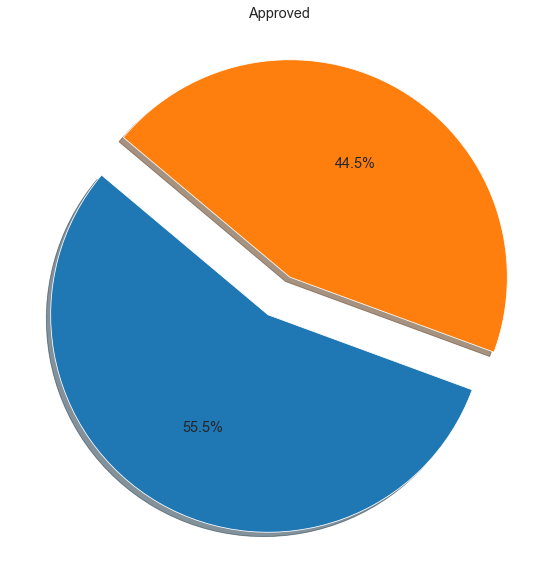

In [241]:
EDA_target(df, target)

## IDV

### IDV Objective

+----+----------+
|    |   Gender |
|----+----------|
|  1 |      480 |
|  0 |      210 |
+----+----------+


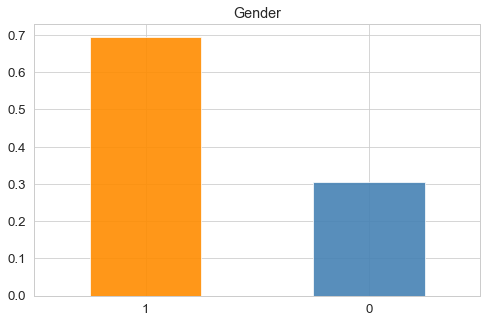

+----+-----------+
|    |   Married |
|----+-----------|
|  1 |       525 |
|  0 |       165 |
+----+-----------+


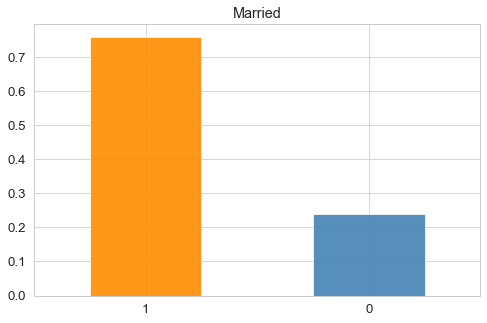

+----+----------------+
|    |   BankCustomer |
|----+----------------|
|  1 |            527 |
|  0 |            163 |
+----+----------------+


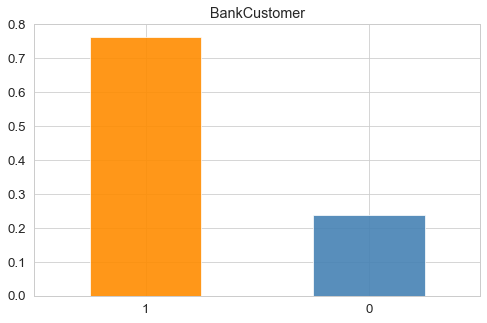

+-----------------------+------------+
|                       |   Industry |
|-----------------------+------------|
| Energy                |        146 |
| Materials             |         78 |
| Industrials           |         64 |
| ConsumerDiscretionary |         59 |
| ConsumerStaples       |         54 |
| Healthcare            |         53 |
| Financials            |         51 |
| InformationTechnology |         41 |
| CommunicationServices |         38 |
| Utilities             |         38 |
| Real Estate           |         30 |
| Education             |         25 |
| Research              |         10 |
| Transport             |          3 |
+-----------------------+------------+


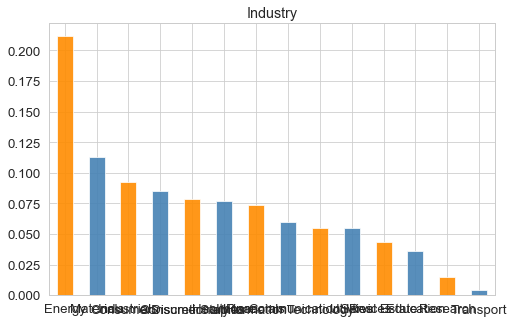

+--------+-------------+
|        |   Ethnicity |
|--------+-------------|
| White  |         408 |
| Black  |         138 |
| Asian  |          59 |
| Latino |          57 |
| Other  |          28 |
+--------+-------------+


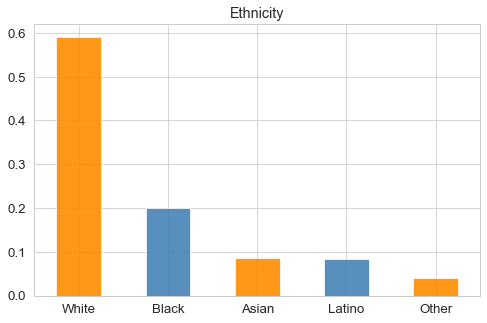

+----+----------------+
|    |   PriorDefault |
|----+----------------|
|  1 |            361 |
|  0 |            329 |
+----+----------------+


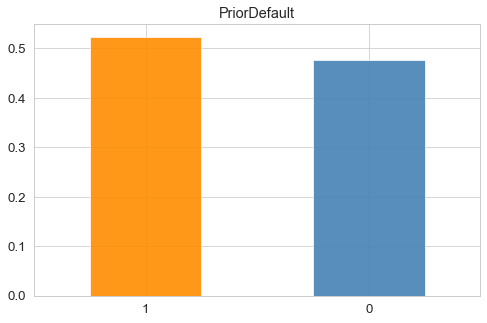

+----+------------+
|    |   Employed |
|----+------------|
|  0 |        395 |
|  1 |        295 |
+----+------------+


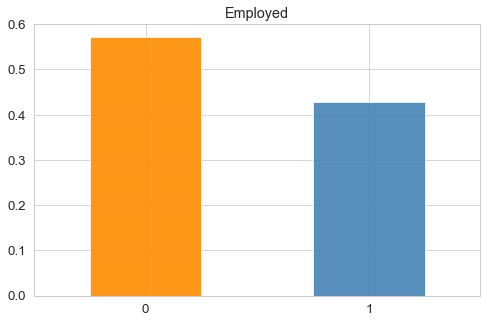

+----+------------------+
|    |   DriversLicense |
|----+------------------|
|  0 |              374 |
|  1 |              316 |
+----+------------------+


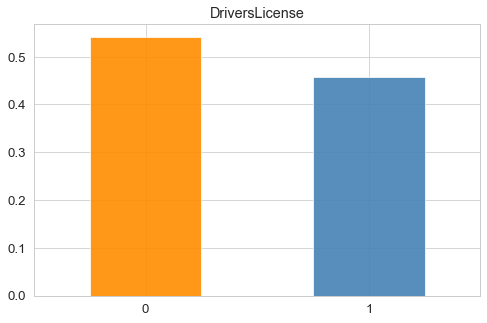

+--------------+-----------+
|              |   Citizen |
|--------------+-----------|
| ByBirth      |       625 |
| ByOtherMeans |        57 |
| Temporary    |         8 |
+--------------+-----------+


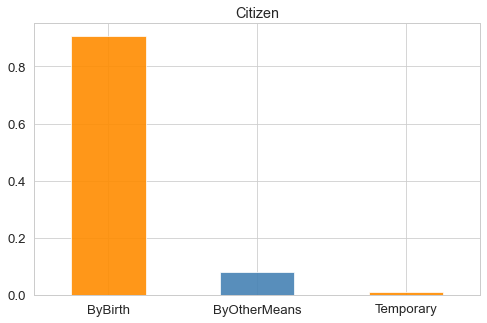

In [242]:
obj_EDA(df, Objcols)

### IDV Objective With DV

In [243]:
EDA_obj(df, Objcols, target)

Variable Name:  Gender


Variable Name:  Married


Variable Name:  BankCustomer


Variable Name:  Industry


Variable Name:  Ethnicity


Variable Name:  PriorDefault


Variable Name:  Employed


Variable Name:  DriversLicense


Variable Name:  Citizen


### IDV Numrical

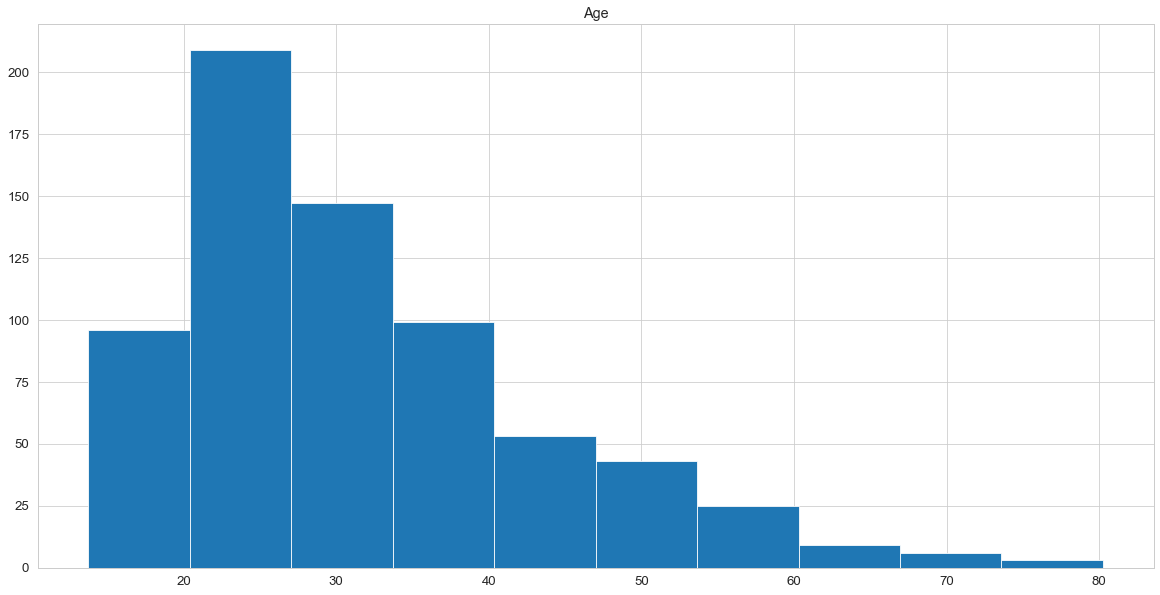

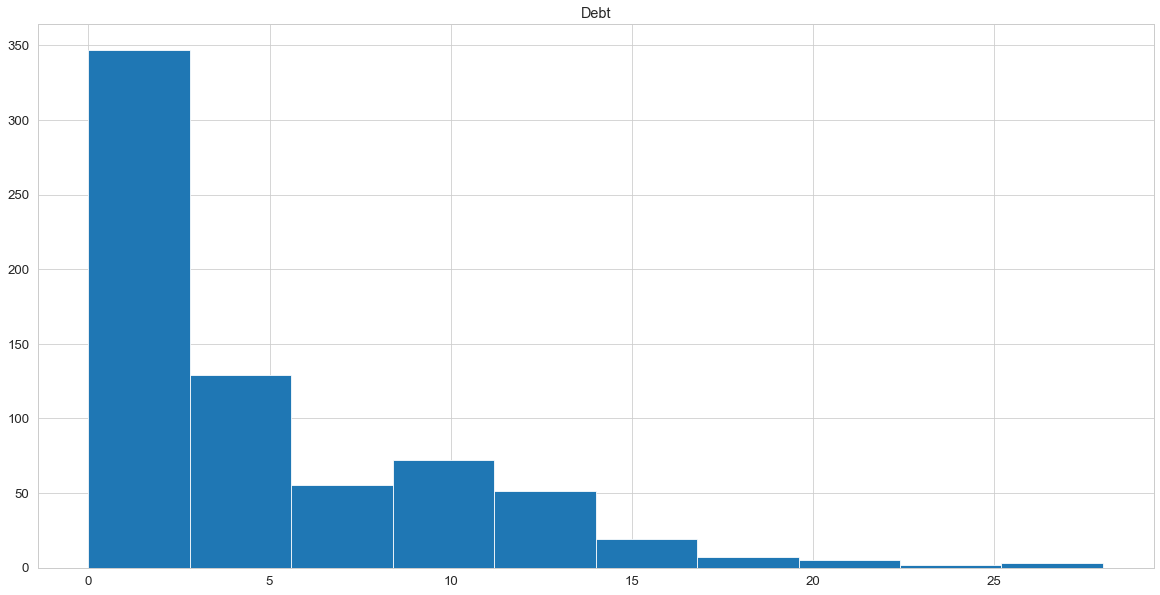

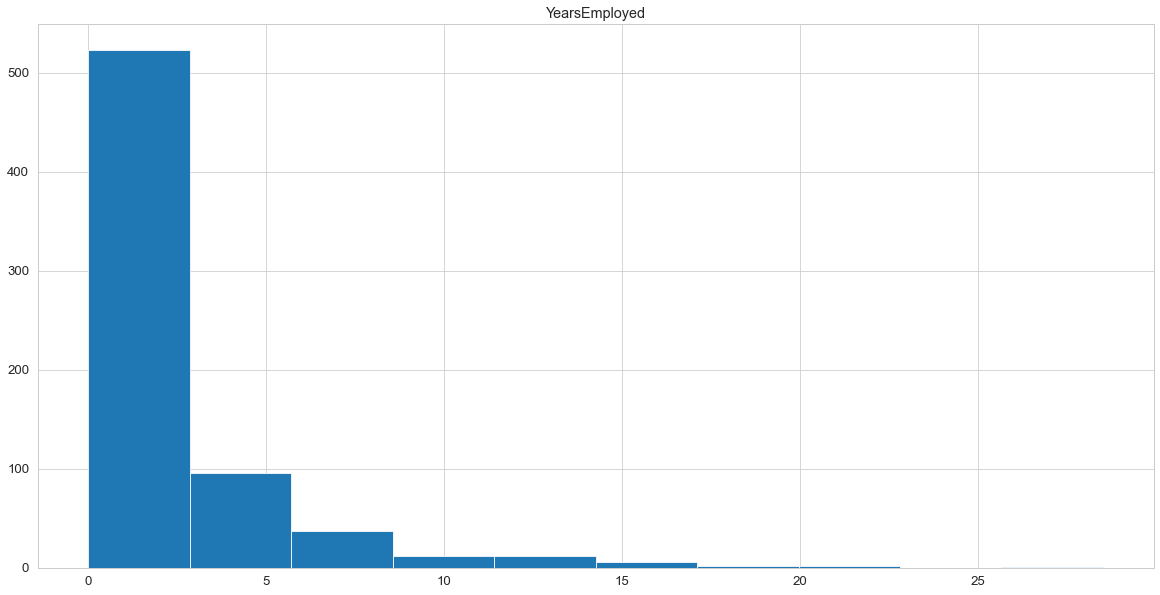

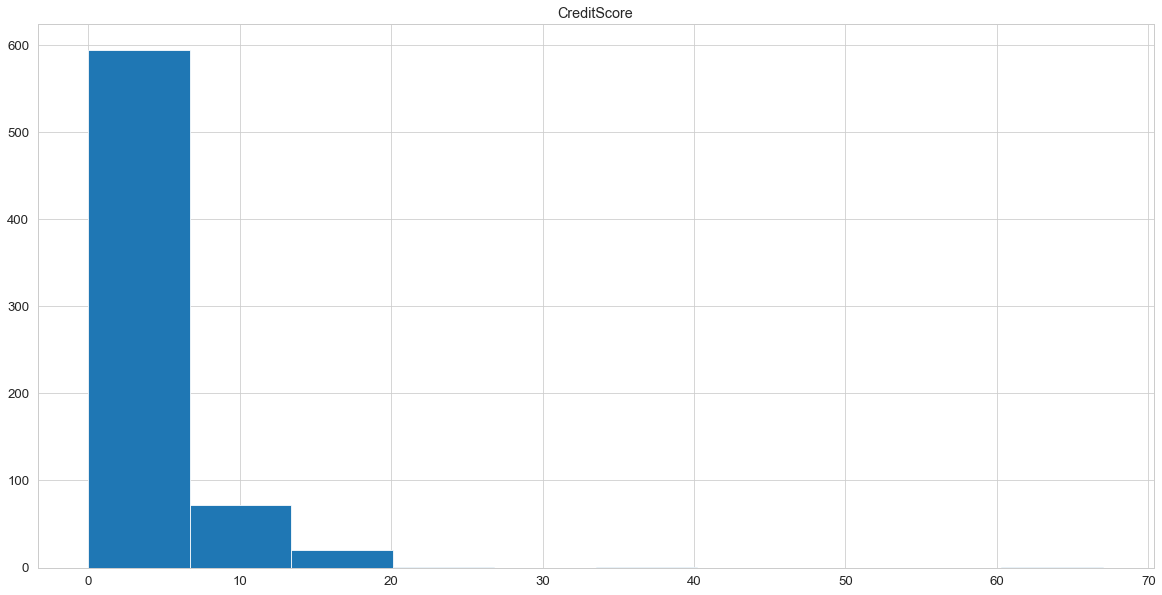

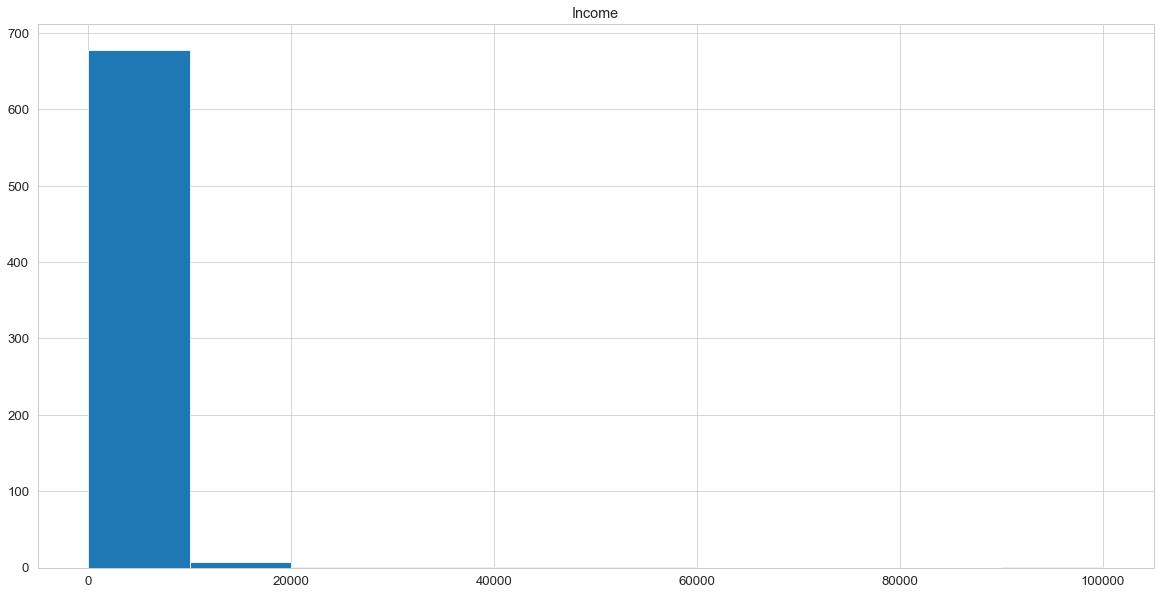

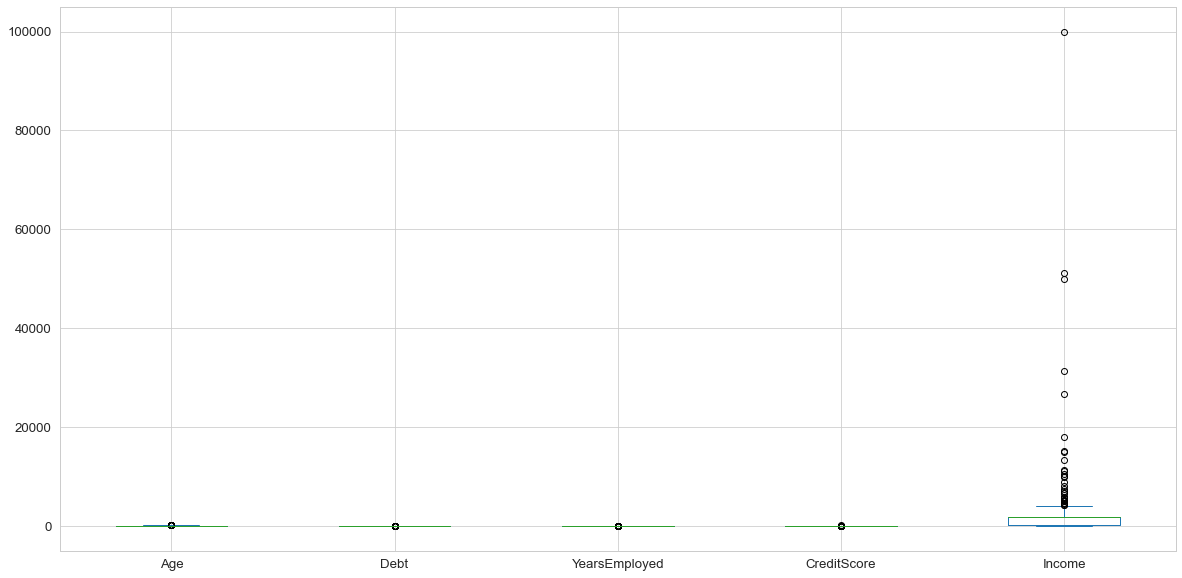

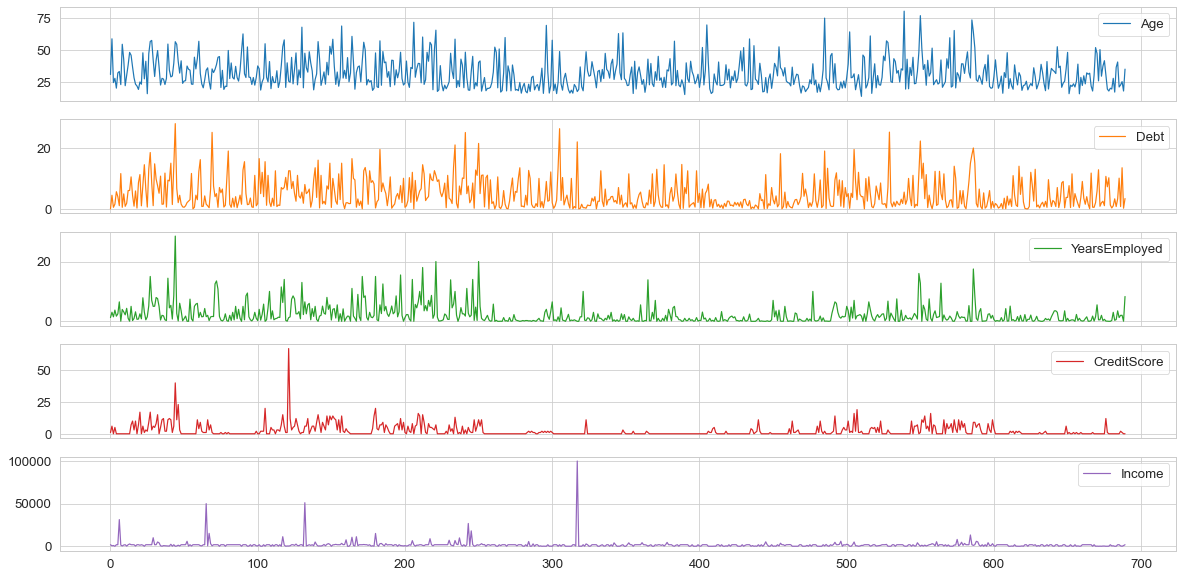

In [244]:
EDA_num(df, NUMcols)

### IDV Objective With DV

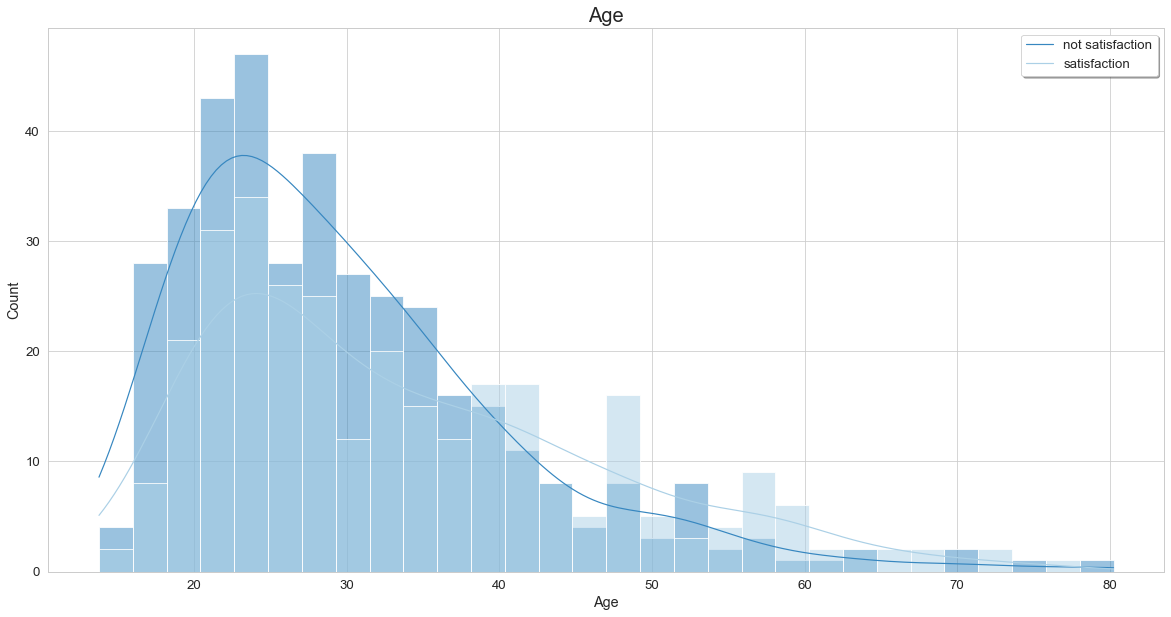

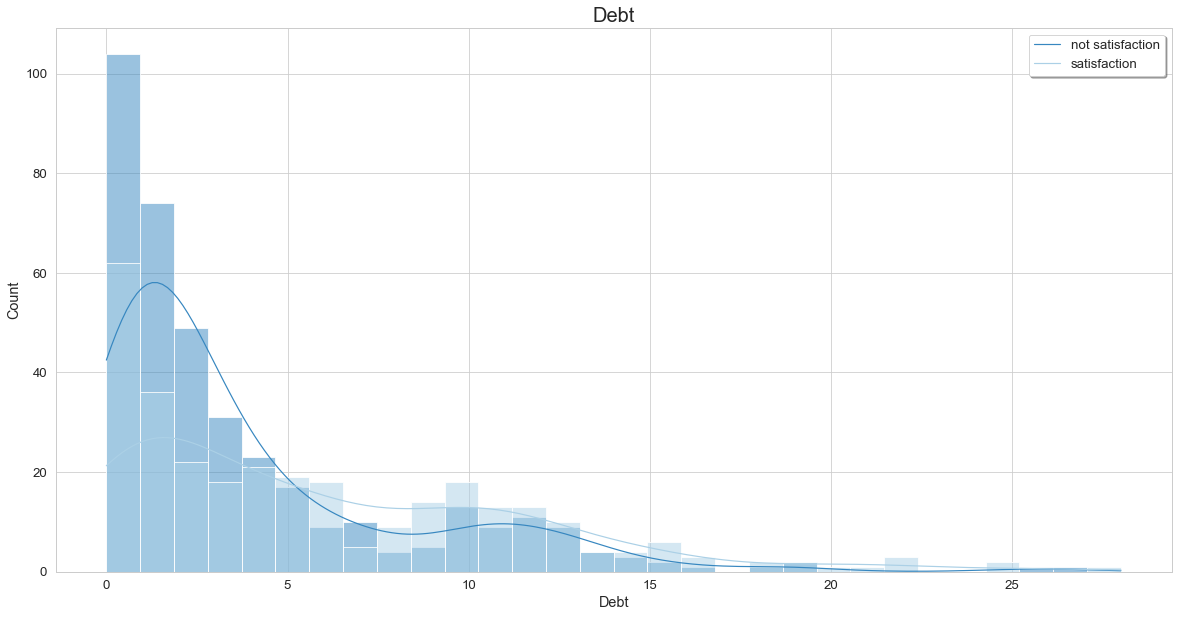

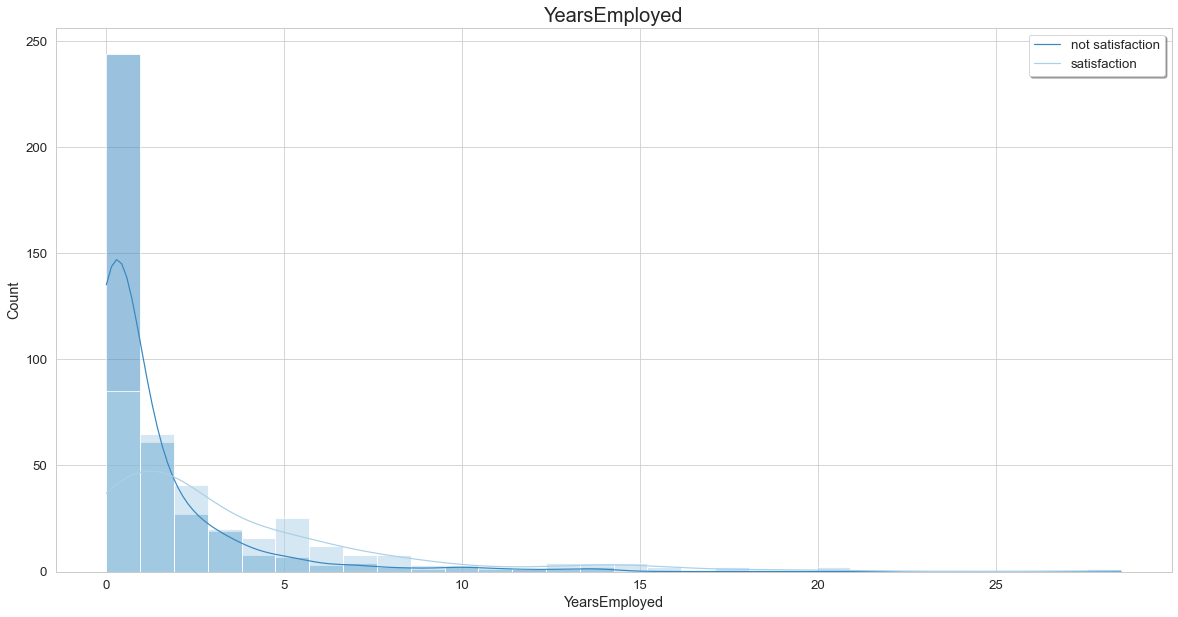

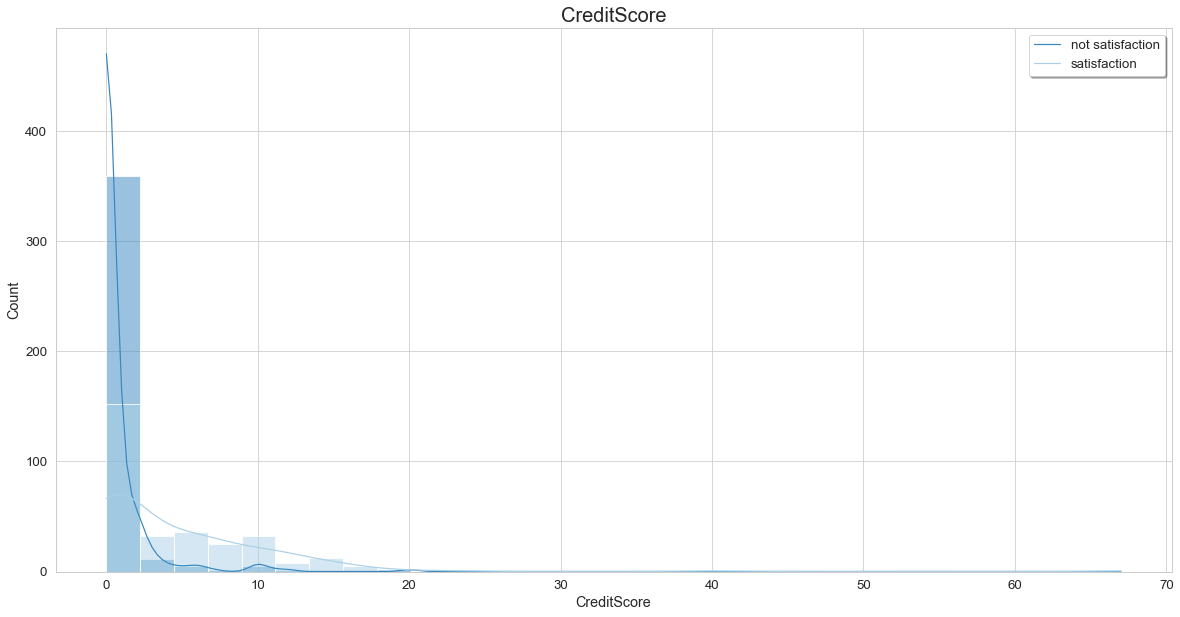

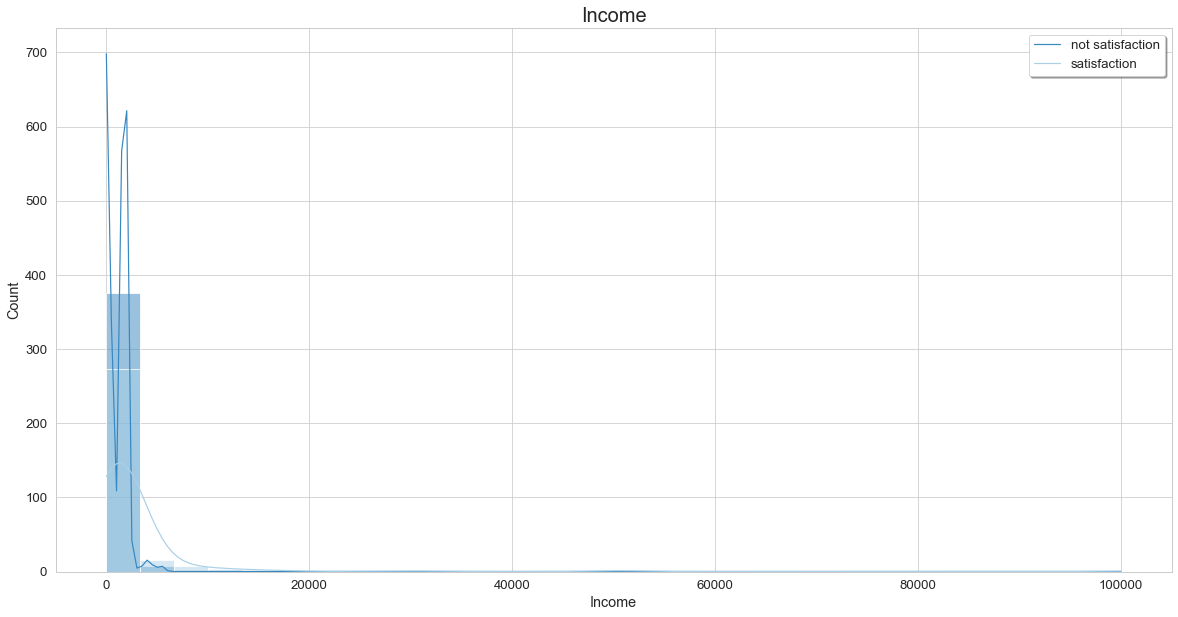

In [245]:
EDA_num_with_DV(df, NUMcols)

# 08. Data Transformation

In [246]:
# StandardScaler
df = NumStandardScaler(df)


Standardization Applied On: Age

Standardization Applied On: Debt

Standardization Applied On: YearsEmployed

Standardization Applied On: CreditScore

Standardization Applied On: Income


In [247]:
pd.DataFrame(df.head())

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
0,1,-0.058,-0.957,1,1,Industrials,White,-0.291,1,1,-0.288,0,ByBirth,0.000,1
1,0,2.291,-0.060,1,1,Materials,Black,0.244,1,1,0.741,0,ByBirth,-0.237,1
2,0,-0.592,-0.856,1,1,Materials,Black,-0.216,1,0,-0.494,0,ByBirth,-0.186,1
3,1,-0.311,-0.647,1,1,Industrials,White,0.457,1,1,0.535,1,ByBirth,-0.346,1
4,1,-0.957,0.174,1,1,Industrials,White,-0.154,1,0,-0.494,0,ByOtherMeans,0.000,1


# 09. Feature Selection

## Wrapper "Forward", "Backward" 

In [248]:
df, fs = Feature_selection_forward(df, target)

All the Num Variables: ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income', 'Approved']

All the obj Variables: ['Gender', 'Married', 'BankCustomer', 'Industry', 'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'Approved']


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.0s finished

[2022-06-23 21:44:07] Features: 1/5 -- score: 0.7282719082719084[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s finished

[2022-06-23 21:44:09] Features: 2/5 -- score: 0.7481736281736282[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s finished

[2022-06-23 21:44:10] Features: 3/5 -- score: 0.778984438984439[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

Most Variables Can Effect The Target Variables:
 ('Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income')

With Highest Score:
 0.7825389025389026
All the Num Variables Selected: ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished

[2022-06-23 21:44:12] Features: 5/5 -- score: 0.7825389025389026

In [249]:
pd.DataFrame(fs)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(3,)","[0.7477477477477478, 0.7027027027027027, 0.7181818181818181, 0.7454545454545455, 0.7272727272727273]",0.728,"(CreditScore,)",0.022,0.017,0.008
2,"(2, 3)","[0.7567567567567568, 0.7477477477477478, 0.7090909090909091, 0.7636363636363637, 0.7636363636363637]",0.748,"(YearsEmployed, CreditScore)",0.026,0.020,0.010
3,"(2, 3, 4)","[0.7927927927927928, 0.7657657657657657, 0.7090909090909091, 0.8272727272727273, 0.8]",0.779,"(YearsEmployed, CreditScore, Income)",0.051,0.040,0.020
4,"(0, 2, 3, 4)","[0.8018018018018018, 0.7657657657657657, 0.7090909090909091, 0.7909090909090909, 0.7363636363636363]",0.761,"(Age, YearsEmployed, CreditScore, Income)",0.044,0.034,0.017
5,"(0, 1, 2, 3, 4)","[0.7927927927927928, 0.8108108108108109, 0.7272727272727273, 0.8454545454545455, 0.7363636363636363]",0.783,"(Age, Debt, YearsEmployed, CreditScore, Income)",0.058,0.045,0.022


In [250]:
pd.DataFrame(df.head())

,Age,Debt,YearsEmployed,CreditScore,Income,Gender,Married,BankCustomer,Industry,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,Approved
0,-0.058,-0.957,-0.291,-0.288,0.000,1,1,1,Industrials,White,1,1,0,ByBirth,1
1,2.291,-0.060,0.244,0.741,-0.237,0,1,1,Materials,Black,1,1,0,ByBirth,1
2,-0.592,-0.856,-0.216,-0.494,-0.186,0,1,1,Materials,Black,1,0,0,ByBirth,1
3,-0.311,-0.647,0.457,0.535,-0.346,1,1,1,Industrials,White,1,1,1,ByBirth,1
4,-0.957,0.174,-0.154,-0.494,0.000,1,1,1,Industrials,White,1,0,0,ByOtherMeans,1


# 10. Feature Engineering 

In [251]:
df = ObjOneHotEncoder(df, Objcols)
df = df.apply(lambda x: AllObjLabelEncoder(x))


OneHoteEncodeing Applied On: Index(['Gender', 'Married', 'BankCustomer', 'Industry', 'Ethnicity',
       'PriorDefault', 'Employed', 'DriversLicense', 'Citizen'],
      dtype='object')

LableEncoding Applied On: Approved


In [252]:
pd.DataFrame(df.head())

,Age,Debt,YearsEmployed,CreditScore,Income,Approved,Gender_0,Gender_1,Married_0,Married_1,BankCustomer_0,BankCustomer_1,Industry_CommunicationServices,Industry_ConsumerDiscretionary,Industry_ConsumerStaples,Industry_Education,Industry_Energy,Industry_Financials,Industry_Healthcare,Industry_Industrials,Industry_InformationTechnology,Industry_Materials,Industry_Real Estate,Industry_Research,Industry_Transport,Industry_Utilities,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Latino,Ethnicity_Other,Ethnicity_White,PriorDefault_0,PriorDefault_1,Employed_0,Employed_1,DriversLicense_0,DriversLicense_1,Citizen_ByBirth,Citizen_ByOtherMeans,Citizen_Temporary
0,-0.058,-0.957,-0.291,-0.288,0.000,1,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000
1,2.291,-0.060,0.244,0.741,-0.237,1,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000
2,-0.592,-0.856,-0.216,-0.494,-0.186,1,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000
3,-0.311,-0.647,0.457,0.535,-0.346,1,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000
4,-0.957,0.174,-0.154,-0.494,0.000,1,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000


# 11. Statistics 

## Correlation between IDV and DV

In [253]:
pd.DataFrame(df.corr()[target].sort_values(ascending = False).reset_index())

,index,Approved
0,Approved,1.000
1,PriorDefault_1,0.720
2,Employed_1,0.458
3,CreditScore,0.406
4,YearsEmployed,0.322
5,Debt,0.206
6,Industry_Utilities,0.193
7,BankCustomer_1,0.189
8,Ethnicity_Black,0.187
9,Married_1,0.181


## Correlation between all the Variables

In [254]:
pd.DataFrame(df.corr())

,Age,Debt,YearsEmployed,CreditScore,Income,Approved,Gender_0,Gender_1,Married_0,Married_1,BankCustomer_0,BankCustomer_1,Industry_CommunicationServices,Industry_ConsumerDiscretionary,Industry_ConsumerStaples,Industry_Education,Industry_Energy,Industry_Financials,Industry_Healthcare,Industry_Industrials,Industry_InformationTechnology,Industry_Materials,Industry_Real Estate,Industry_Research,Industry_Transport,Industry_Utilities,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Latino,Ethnicity_Other,Ethnicity_White,PriorDefault_0,PriorDefault_1,Employed_0,Employed_1,DriversLicense_0,DriversLicense_1,Citizen_ByBirth,Citizen_ByOtherMeans,Citizen_Temporary
Age,1.000,0.202,0.391,0.187,0.018,0.164,-0.035,0.035,-0.107,0.107,-0.099,0.099,0.036,0.030,-0.077,0.145,-0.059,-0.004,0.167,-0.047,-0.026,-0.062,-0.018,-0.001,-0.010,0.007,0.124,0.020,0.165,0.076,-0.209,-0.204,0.204,-0.086,0.086,-0.054,0.054,0.013,-0.019,0.014
Debt,0.202,1.000,0.299,0.271,0.112,0.206,0.042,-0.042,-0.075,0.075,-0.084,0.084,-0.073,-0.034,0.024,0.134,-0.058,-0.042,0.063,-0.012,-0.037,0.031,0.001,-0.002,0.011,0.064,-0.004,0.061,0.037,0.117,-0.115,-0.244,0.244,-0.175,0.175,0.013,-0.013,0.124,-0.116,-0.038
YearsEmployed,0.391,0.299,1.000,0.322,0.054,0.322,-0.087,0.087,-0.070,0.070,-0.076,0.076,0.026,-0.025,-0.060,0.108,-0.006,-0.059,-0.078,-0.009,0.060,0.046,0.009,-0.080,0.039,0.062,0.074,0.178,-0.073,0.037,-0.161,-0.346,0.346,-0.223,0.223,-0.138,0.138,0.032,-0.008,-0.066
CreditScore,0.187,0.271,0.322,1.000,0.022,0.406,0.025,-0.025,-0.114,0.114,-0.111,0.111,-0.017,-0.054,-0.066,0.026,0.028,-0.054,-0.041,-0.015,0.122,0.079,-0.047,0.007,0.008,0.018,0.032,0.065,-0.033,0.025,-0.063,-0.380,0.380,-0.571,0.571,-0.007,0.007,0.143,-0.131,-0.053
Income,0.018,0.112,0.054,0.022,1.000,0.160,-0.010,0.010,0.010,-0.010,-0.055,0.055,0.004,-0.023,-0.029,0.080,-0.026,-0.021,0.060,-0.037,0.048,-0.008,-0.018,-0.026,0.112,-0.003,0.051,-0.011,-0.044,0.125,-0.046,-0.086,0.086,-0.013,0.013,-0.030,0.030,-0.092,-0.004,0.259
Approved,0.164,0.206,0.322,0.406,0.160,1.000,0.029,-0.029,-0.181,0.181,-0.189,0.189,-0.012,-0.128,-0.055,0.045,0.007,-0.097,-0.182,0.045,0.133,0.150,-0.091,-0.035,0.029,0.193,-0.013,0.187,-0.184,0.023,-0.051,-0.720,0.720,-0.458,0.458,-0.032,0.032,0.089,-0.110,0.039
Gender_0,-0.035,0.042,-0.087,0.025,-0.010,0.029,1.000,-1.000,-0.068,0.068,-0.071,0.071,-0.118,-0.022,0.077,-0.027,-0.080,-0.054,0.117,-0.103,-0.033,0.221,-0.064,0.157,-0.044,-0.008,-0.078,0.039,0.133,0.056,-0.084,-0.026,0.026,-0.078,0.078,0.052,-0.052,0.084,-0.084,-0.013
Gender_1,0.035,-0.042,0.087,-0.025,0.010,-0.029,-1.000,1.000,0.068,-0.068,0.071,-0.071,0.118,0.022,-0.077,0.027,0.080,0.054,-0.117,0.103,0.033,-0.221,0.064,-0.157,0.044,0.008,0.078,-0.039,-0.133,-0.056,0.084,0.026,-0.026,0.078,-0.078,-0.052,0.052,-0.084,0.084,0.013
Married_0,-0.107,-0.075,-0.070,-0.114,0.010,-0.181,-0.068,0.068,1.000,-1.000,0.992,-0.992,-0.016,-0.026,0.014,0.000,0.017,0.062,0.081,-0.015,0.003,-0.136,-0.003,0.074,0.015,-0.001,-0.038,-0.000,0.091,0.022,-0.038,0.145,-0.145,0.175,-0.175,-0.010,0.010,0.018,-0.008,-0.029
Married_1,0.107,0.075,0.070,0.114,-0.010,0.181,0.068,-0.068,-1.000,1.000,-0.992,0.992,0.016,0.026,-0.014,-0.000,-0.017,-0.062,-0.081,0.015,-0.003,0.136,0.003,-0.074,-0.015,0.001,0.038,-0.000,-0.091,-0.022,0.038,-0.145,0.145,-0.175,0.175,0.010,-0.010,-0.018,0.008,0.029


In [255]:
df.corr().style.background_gradient(cmap="Blues") # YlOrBr Greys GnBu

,Age,Debt,YearsEmployed,CreditScore,Income,Approved,Gender_0,Gender_1,Married_0,Married_1,BankCustomer_0,BankCustomer_1,Industry_CommunicationServices,Industry_ConsumerDiscretionary,Industry_ConsumerStaples,Industry_Education,Industry_Energy,Industry_Financials,Industry_Healthcare,Industry_Industrials,Industry_InformationTechnology,Industry_Materials,Industry_Real Estate,Industry_Research,Industry_Transport,Industry_Utilities,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Latino,Ethnicity_Other,Ethnicity_White,PriorDefault_0,PriorDefault_1,Employed_0,Employed_1,DriversLicense_0,DriversLicense_1,Citizen_ByBirth,Citizen_ByOtherMeans,Citizen_Temporary
Age,1.000000,0.202177,0.391464,0.187327,0.018305,0.164086,-0.035044,0.035044,-0.106929,0.106929,-0.099477,0.099477,0.036282,0.029670,-0.077206,0.144554,-0.058879,-0.004216,0.166759,-0.047101,-0.025805,-0.061783,-0.017769,-0.000902,-0.009669,0.006971,0.123759,0.019548,0.164837,0.075785,-0.209031,-0.204434,0.204434,-0.086037,0.086037,-0.053599,0.053599,0.012625,-0.018712,0.013670
Debt,0.202177,1.000000,0.298902,0.271207,0.111660,0.206294,0.041746,-0.041746,-0.074649,0.074649,-0.083781,0.083781,-0.073015,-0.034094,0.023754,0.134457,-0.058340,-0.042265,0.062583,-0.012166,-0.036943,0.030992,0.001176,-0.002236,0.011131,0.064218,-0.003667,0.061269,0.037302,0.116594,-0.115455,-0.244317,0.244317,-0.174846,0.174846,0.013023,-0.013023,0.123569,-0.116404,-0.037842
YearsEmployed,0.391464,0.298902,1.000000,0.322330,0.053613,0.322475,-0.086544,0.086544,-0.069945,0.069945,-0.075905,0.075905,0.025810,-0.024744,-0.059839,0.108307,-0.005610,-0.058563,-0.077599,-0.008729,0.060111,0.045672,0.008507,-0.079577,0.039224,0.062229,0.074188,0.178414,-0.073321,0.036877,-0.161115,-0.345689,0.345689,-0.222982,0.222982,-0.138139,0.138139,0.031670,-0.007965,-0.065938
CreditScore,0.187327,0.271207,0.322330,1.000000,0.022065,0.406410,0.024630,-0.024630,-0.113968,0.113968,-0.111077,0.111077,-0.017257,-0.053967,-0.066182,0.025536,0.028186,-0.054033,-0.040543,-0.015010,0.121865,0.078929,-0.046799,0.007487,0.008159,0.018042,0.032423,0.065464,-0.033368,0.025393,-0.063216,-0.379532,0.379532,-0.571498,0.571498,-0.006944,0.006944,0.142938,-0.130871,-0.053491
Income,0.018305,0.111660,0.053613,0.022065,1.000000,0.159781,-0.009669,0.009669,0.009890,-0.009890,-0.055376,0.055376,0.004342,-0.023194,-0.028559,0.080053,-0.025620,-0.020690,0.060447,-0.036695,0.047731,-0.008076,-0.017528,-0.025873,0.111989,-0.003491,0.051163,-0.011068,-0.043867,0.125026,-0.045715,-0.085957,0.085957,-0.012712,0.012712,-0.030461,0.030461,-0.091556,-0.003618,0.259135
Approved,0.164086,0.206294,0.322475,0.406410,0.159781,1.000000,0.028934,-0.028934,-0.180583,0.180583,-0.188964,0.188964,-0.011598,-0.127762,-0.054574,0.044896,0.007430,-0.096879,-0.181588,0.045487,0.132708,0.150082,-0.090776,-0.035365,0.029485,0.192945,-0.013044,0.186643,-0.183913,0.022791,-0.050605,-0.720407,0.720407,-0.458301,0.458301,-0.031625,0.031625,0.089056,-0.109758,0.039245
Gender_0,-0.035044,0.041746,-0.086544,0.024630,-0.009669,0.028934,1.000000,-1.000000,-0.068062,0.068062,-0.071250,0.071250,-0.118261,-0.022038,0.076991,-0.027115,-0.080469,-0.054436,0.116737,-0.102913,-0.033018,0.221431,-0.063794,0.156985,-0.043709,-0.007804,-0.078356,0.039371,0.133317,0.055523,-0.084407,-0.026047,0.026047,-0.077784,0.077784,0.051674,-0.051674,0.083916,-0.084069,-0.012792
Gender_1,0.035044,-0.041746,0.086544,-0.024630,0.009669,-0.028934,-1.000000,1.000000,0.068062,-0.068062,0.071250,-0.071250,0.118261,0.022038,-0.076991,0.027115,0.080469,0.054436,-0.116737,0.102913,0.033018,-0.221431,0.063794,-0.156985,0.043709,0.007804,0.078356,-0.039371,-0.133317,-0.055523,0.084407,0.026047,-0.026047,0.077784,-0.077784,-0.051674,0.051674,-0.083916,0.084069,0.012792
Married_0,-0.106929,-0.074649,-0.069945,-0.113968,0.009890,-0.180583,-0.068062,0.068062,1.000000,-1.000000,0.992033,-0.992033,-0.016189,-0.025621,0.013750,0.000395,0.017361,0.062392,0.080715,-0.015277,0.002812,-0.135759,-0.002898,0.074165,0.014594,-0.001

# 12. Resampling Data

In [256]:
# Define X, y
X = df.drop(target, axis=1)
y = df[target]

X, y = resampling_by_SMOTE(X, y)


Original dataset shape Counter({0: 383, 1: 307})
SMOTE Resample dataset shape Counter({1: 383, 0: 383})
SMOTE Mean ROC AUC:  0.8285537561853353

Original dataset shape Counter({0: 383, 1: 307})
SMOTE SVM Resample dataset shape Counter({1: 383, 0: 383})
SMOTE SVM Mean ROC AUC:  0.82204228520018

Original dataset shape Counter({0: 383, 1: 307})
Standerd SMOTE pipeline Resample dataset shape Counter({0: 383, 1: 383})
Standerd SMOTE pipeline Mean ROC AUC:  0.8168466036887092

Original dataset shape Counter({0: 383, 1: 307})
K neighbors SMOTE pipeline Resample dataset shape Counter({0: 383, 1: 383})
K neighbors SMOTE pipeline Mean ROC AUC:  0.8215587044534413

	The Highest ROC Score is:  0.8285537561853353


In [144]:
print('\nOriginal dataset shape', Counter(y))


Original dataset shape Counter({0: 383, 1: 383})


# 13. Data Splitting 

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(612, 39)
(612,)
(154, 39)
(154,)


# 14. Machine Learning Models 

## Build the Models using CPU

In [146]:
# Random Forest Classifier
rf_m_1_cpu = RandomForestClassifier().fit(X_train, y_train)
print ('Random Forest Classifier Built')

# Gradient Boosting Classifier
gb_m_1_cpu = GradientBoostingClassifier().fit(X_train, y_train)
print ('Gradient Boosting Classifier Built')

# Histogram-based Gradient Boosting Classification Tree
hgb_m_1_cpu = HistGradientBoostingClassifier().fit(X_train, y_train)
print ('Histogram-based Gradient Boosting Classification Tree Built')

# AdaBoost Classifier
ad_m_1_cpu = AdaBoostClassifier().fit(X_train, y_train)
print ('AdaBoost Classifier Built')

# Extra Trees Classifier
et_m_1_cpu = ExtraTreesClassifier().fit(X_train, y_train)
print ('Extra Trees Classifier Built')

# K Neighbors Classifier
knn_m_1_cpu = KNeighborsClassifier().fit(X_train, y_train)
print ('K Neighbors Classifier Classifiers Built')

# Naive Bayes Classifiers
nb_m_1_cpu = GaussianNB().fit(X_train, y_train)
print ('Naive Bayes Classifiers Built')

# Naive Bayes Classifier for Multivariate Bernoulli
bnb_m_1_cpu = BernoulliNB().fit(X_train, y_train)
print ('Naive Bayes Classifier for Multivariate Bernoulli Built')

# Decision Tree Classifier
dt_m_1_cpu = DecisionTreeClassifier().fit(X_train, y_train)
print ('Decision Tree Classifier Built')

# Logistic Regression Classifier
lg_m_1_cpu = LogisticRegression().fit(X_train, y_train)
print ('Logistic Regression Classifier Built')

# Logistic Regression CV Classifier
lgcv_m_1_cpu = LogisticRegressionCV().fit(X_train, y_train)
print ('Logistic Regression CV Classifier Built')

# Stochastic Gradient Descent Classifier
sgdc_m_1_cpu = SGDClassifier().fit(X_train, y_train)
print ('Stochastic Gradient Descent Classifier Built')

# Linear Perceptron Classifier
lpc_m_1_cpu = Perceptron().fit(X_train, y_train)
print ('Linear Perceptron Classifier Built')

# XGBoost Classifiers
xgb_m_1_cpu = XGBClassifier().fit(X_train, y_train)
print ('XGBoost Classifier Built')

# Support Vector Machines Classifiers
svm_m_1_cpu = SVC().fit(X_train, y_train)
print ('Support Vector Machines Classifiers Built')

# Linear Support Vector Classification
lsvm_m_1_cpu = LinearSVC().fit(X_train, y_train)
print ('Linear Support Vector Classification Built')

# Multilayer Perceptron Classifier
mlp_m_1_cpu = MLPClassifier().fit(X_train, y_train)
print ('Multilayer Perceptron Classifier Built')

Random Forest Classifier Built
Gradient Boosting Classifier Built
Histogram-based Gradient Boosting Classification Tree Built
AdaBoost Classifier Built
Extra Trees Classifier Built
K Neighbors Classifier Classifiers Built
Naive Bayes Classifiers Built
Naive Bayes Classifier for Multivariate Bernoulli Built
Decision Tree Classifier Built
Logistic Regression Classifier Built
Logistic Regression CV Classifier Built
Stochastic Gradient Descent Classifier Built
Linear Perceptron Classifier Built
XGBoost Classifier Built
Support Vector Machines Classifiers Built
Linear Support Vector Classification Built
Multilayer Perceptron Classifier Built


## Predict y_test Using CPU

In [147]:
# Random Forest Classifier
rf_m_1_pred_vaild_cpu = rf_m_1_cpu.predict(X_test)

# Gradient Boosting Classifier
gb_m_1_pred_vaild_cpu = gb_m_1_cpu.predict(X_test)

# Histogram-based Gradient Boosting Classification Tree
hgb_m_1_pred_vaild_cpu = hgb_m_1_cpu.predict(X_test)

# AdaBoost Classifier
ad_m_1_pred_vaild_cpu = ad_m_1_cpu.predict(X_test)

# Extra Trees Classifier
et_m_1_pred_vaild_cpu = et_m_1_cpu.predict(X_test)

# K Neighbors Classifier
knn_m_1_pred_vaild_cpu = knn_m_1_cpu.predict(X_test)

# Naive Bayes Classifiers
nb_m_1_pred_vaild_cpu = nb_m_1_cpu.predict(X_test)

# Naive Bayes Classifier for Multivariate Bernoulli
bnb_m_1_pred_vaild_cpu = bnb_m_1_cpu.predict(X_test)

# Decision Tree Classifier
dt_m_1_pred_vaild_cpu = dt_m_1_cpu.predict(X_test)

# Logistic Regression Classifier
lg_m_1_pred_vaild_cpu = lg_m_1_cpu.predict(X_test)

# Logistic Regression CV Classifier
lgcv_m_1_pred_vaild_cpu =  lgcv_m_1_cpu.predict(X_test)

# Stochastic Gradient Descent Classifier
sgdc_m_1_pred_vaild_cpu =  sgdc_m_1_cpu.predict(X_test)

# Linear Perceptron Classifier
lpc_m_1_pred_vaild_cpu =  lpc_m_1_cpu.predict(X_test)

# XGBoost Classifiers
xgb_m_1_pred_vaild_cpu = xgb_m_1_cpu.predict(X_test)

# Support Vector Machines Classifiers
svm_m_1_pred_vaild_cpu = svm_m_1_cpu.predict(X_test)

# Linear Support Vector Classification
lsvm_m_1_pred_vaild_cpu = lsvm_m_1_cpu.predict(X_test)

# Multilayer Perceptron Classifier
mlp_m_1_pred_vaild_cpu = mlp_m_1_cpu.predict(X_test)

## Evaluate the Models CPU

### Accuracy Score

In [148]:
# Random Forest Classifier
Valid_accuracy_rf_m_1_cpu = accuracy_score(y_test, rf_m_1_pred_vaild_cpu)

# Gradient Boosting Classifier
Valid_accuracy_gb_m_1_cpu = accuracy_score(y_test, gb_m_1_pred_vaild_cpu)

# Histogram-based Gradient Boosting Classification Tree
Valid_accuracy_hgb_m_1_cpu = accuracy_score(y_test, hgb_m_1_pred_vaild_cpu)

# AdaBoost Classifier
Valid_accuracy_ad_m_1_cpu = accuracy_score(y_test, ad_m_1_pred_vaild_cpu)

# Extra Trees Classifier
Valid_accuracy_et_m_1_cpu = accuracy_score(y_test, et_m_1_pred_vaild_cpu)

# K Neighbors Classifier
Valid_accuracy_knn_m_1_cpu = accuracy_score(y_test, knn_m_1_pred_vaild_cpu)

# Naive Bayes Classifiers
Valid_accuracy_nb_m_1_cpu = accuracy_score(y_test, nb_m_1_pred_vaild_cpu)

# Naive Bayes Classifier for Multivariate Bernoulli
Valid_accuracy_bnb_m_1_cpu = accuracy_score(y_test, bnb_m_1_pred_vaild_cpu)

# Decision Tree Classifier
Valid_accuracy_dt_m_1_cpu = accuracy_score(y_test, dt_m_1_pred_vaild_cpu)

# Logistic Regression Classifier
Valid_accuracy_lg_m_1_cpu = accuracy_score(y_test, lg_m_1_pred_vaild_cpu)

# Logistic Regression CV Classifier
Valid_accuracy_lgcv_m_1_cpu = accuracy_score(y_test, lgcv_m_1_pred_vaild_cpu)

# Stochastic Gradient Descent Classifier
Valid_accuracy_sgdc_m_1_cpu = accuracy_score(y_test, sgdc_m_1_pred_vaild_cpu)

# Linear Perceptron Classifier
Valid_accuracy_lpc_m_1_cpu = accuracy_score(y_test, lpc_m_1_pred_vaild_cpu)

# XGBoost Classifiers
Valid_accuracy_xgb_m_1_cpu = accuracy_score(y_test, xgb_m_1_pred_vaild_cpu)

# Support Vector Machines Classifiers
Valid_accuracy_svm_m_1_cpu = accuracy_score(y_test, svm_m_1_pred_vaild_cpu)

# Linear Support Vector Classification
Valid_accuracy_lsvm_m_1_cpu = accuracy_score(y_test, lsvm_m_1_pred_vaild_cpu)

# Multilayer Perceptron Classifier
Valid_accuracy_mlp_m_1_cpu = accuracy_score(y_test, mlp_m_1_pred_vaild_cpu)

cpu_ml_m_1_valid_compare = pd.DataFrame({"Standered CPU Models": [
                                "Random Forest Classifier", 
                                "Gradient Boosting Classifier",
                                "Histogram-based Gradient Boosting Classification Tree",
                                "AdaBoost Classifier",
                                "Extra Trees Classifier",
                                "K Neighbors Classifier",
                                "Naive Bayes Classifiers",
                                "Naive Bayes Classifier for Multivariate Bernoulli",
                                "Decision Tree Classifier",
                                "Logistic Regression Classifier",
                                "Logistic Regression CV Classifier",
                                "Stochastic Gradient Descent Classifier",
                                "Linear Perceptron Classifier",
                                "XGBoost Classifiers",
                                "Support Vector Machines Classifiers",
                                "Linear Support Vector Classification",
                                "Multilayer Perceptron Classifier"
                                ],

                "Standered CPU Models Accuracy": [
                                Valid_accuracy_rf_m_1_cpu, 
                                Valid_accuracy_gb_m_1_cpu,
                                Valid_accuracy_hgb_m_1_cpu,
                                Valid_accuracy_ad_m_1_cpu,
                                Valid_accuracy_et_m_1_cpu,
                                Valid_accuracy_knn_m_1_cpu,
                                Valid_accuracy_nb_m_1_cpu,
                                Valid_accuracy_bnb_m_1_cpu,
                                Valid_accuracy_dt_m_1_cpu,
                                Valid_accuracy_lg_m_1_cpu,
                                Valid_accuracy_lgcv_m_1_cpu,
                                Valid_accuracy_sgdc_m_1_cpu,
                                Valid_accuracy_lpc_m_1_cpu,
                                Valid_accuracy_xgb_m_1_cpu,
                                Valid_accuracy_svm_m_1_cpu,
                                Valid_accuracy_lsvm_m_1_cpu,
                                Valid_accuracy_mlp_m_1_cpu
                                ],
                        })  
                                
print(tabulate(cpu_ml_m_1_valid_compare, headers = 'keys', tablefmt = 'psql'))
fig = px.bar(cpu_ml_m_1_valid_compare.sort_values(by="Standered CPU Models Accuracy", ascending=True), x = "Standered CPU Models Accuracy", y = "Standered CPU Models", title = "CPU Model Machines Learning Validation Accuracy")
fig.show()

+----+-------------------------------------------------------+---------------------------------+
|    | Standered CPU Models                                  |   Standered CPU Models Accuracy |
|----+-------------------------------------------------------+---------------------------------|
|  0 | Random Forest Classifier                              |                        0.876623 |
|  1 | Gradient Boosting Classifier                          |                        0.857143 |
|  2 | Histogram-based Gradient Boosting Classification Tree |                        0.857143 |
|  3 | AdaBoost Classifier                                   |                        0.857143 |
|  4 | Extra Trees Classifier                                |                        0.844156 |
|  5 | K Neighbors Classifier                                |                        0.863636 |
|  6 | Naive Bayes Classifiers                               |                        0.818182 |
|  7 | Naive Bayes Classifier 

### Classification Report and Confusion Matrix

#### Random Forest Classifier

Model Random Forest Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.883     0.872     0.877        78
           1      0.870     0.882     0.876        76

    accuracy                          0.877       154
   macro avg      0.877     0.877     0.877       154
weighted avg      0.877     0.877     0.877       154



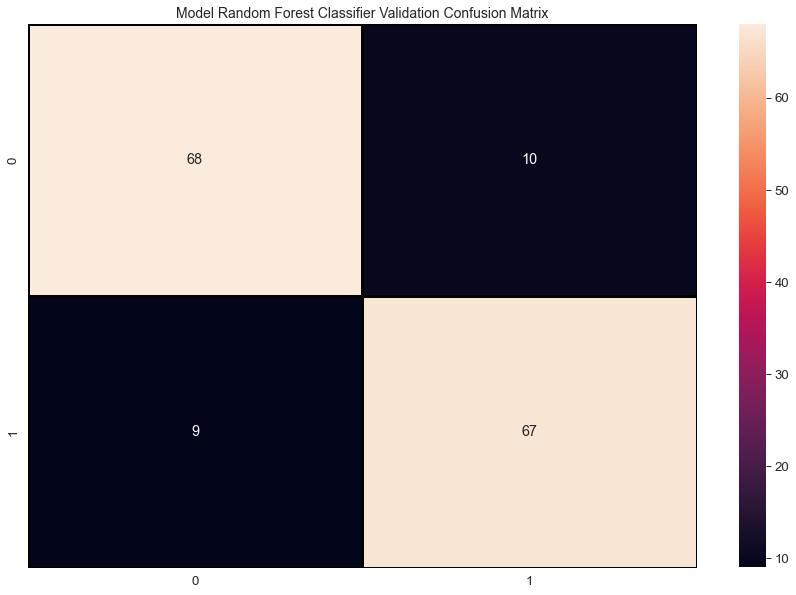

In [149]:
print('Model Random Forest Classifier Validation Classification Report:\n ', classification_report(y_test, rf_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, rf_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Random Forest Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Gradient Boosting Classifier

Model Gradient Boosting Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.868     0.846     0.857        78
           1      0.846     0.868     0.857        76

    accuracy                          0.857       154
   macro avg      0.857     0.857     0.857       154
weighted avg      0.857     0.857     0.857       154



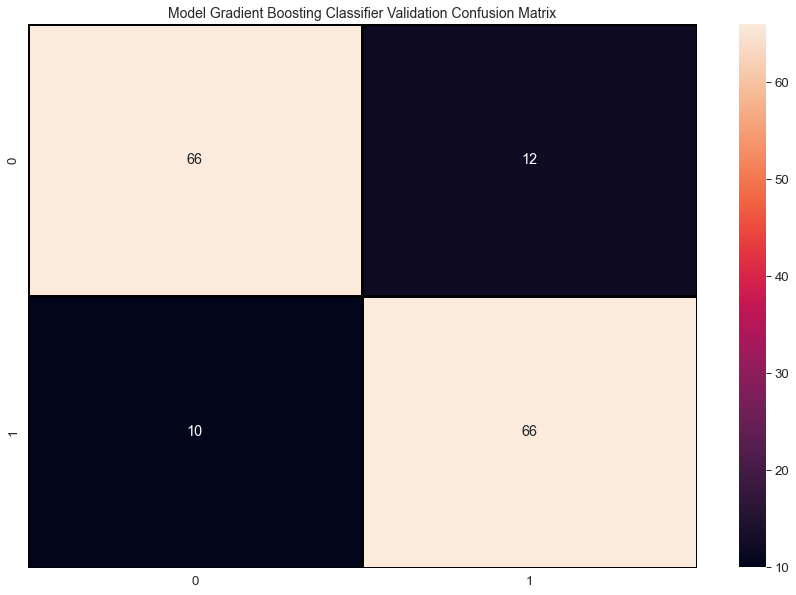

In [150]:
print('Model Gradient Boosting Classifier Validation Classification Report:\n ', classification_report(y_test, gb_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, gb_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Gradient Boosting Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Histogram-based Gradient Boosting Classification Tree

Model Histogram-based Gradient Boosting Classification Tree Validation Classification Report:
                precision    recall  f1-score   support

           0      0.850     0.872     0.861        78
           1      0.865     0.842     0.853        76

    accuracy                          0.857       154
   macro avg      0.857     0.857     0.857       154
weighted avg      0.857     0.857     0.857       154



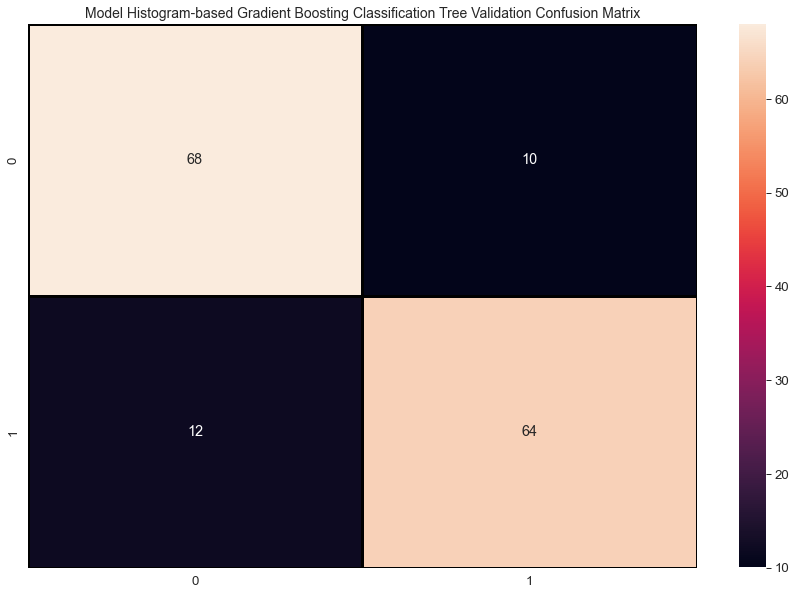

In [151]:
print('Model Histogram-based Gradient Boosting Classification Tree Validation Classification Report:\n ', classification_report(y_test, hgb_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, hgb_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Histogram-based Gradient Boosting Classification Tree Validation Confusion Matrix",fontsize=14)
plt.show()

#### AdaBoost Classifier

Model AdaBoost Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.868     0.846     0.857        78
           1      0.846     0.868     0.857        76

    accuracy                          0.857       154
   macro avg      0.857     0.857     0.857       154
weighted avg      0.857     0.857     0.857       154



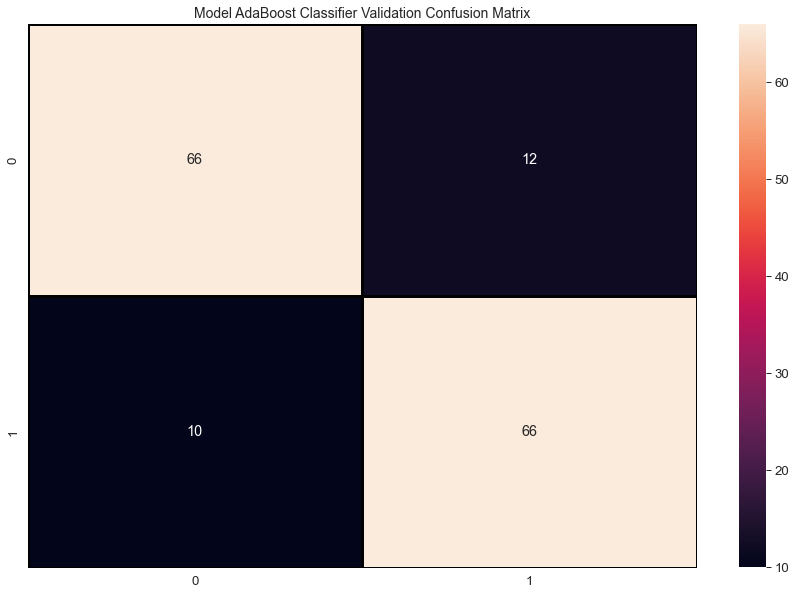

In [152]:
print('Model AdaBoost Classifier Validation Classification Report:\n ', classification_report(y_test, ad_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, ad_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model AdaBoost Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Extra Trees Classifier

Model Extra Trees Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.846     0.846     0.846        78
           1      0.842     0.842     0.842        76

    accuracy                          0.844       154
   macro avg      0.844     0.844     0.844       154
weighted avg      0.844     0.844     0.844       154



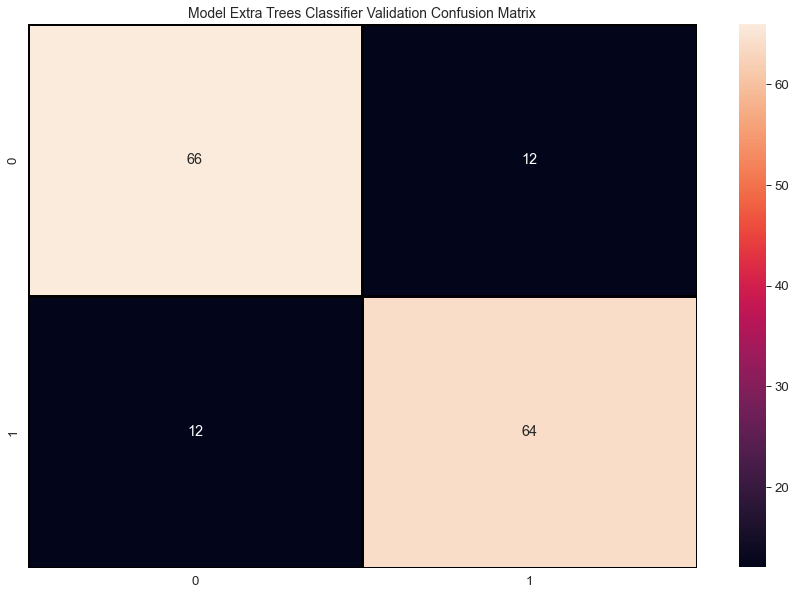

In [153]:
print('Model Extra Trees Classifier Validation Classification Report:\n ', classification_report(y_test, et_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, et_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Extra Trees Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### K Neighbors Classifier

Model K Neighbors Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.870     0.859     0.865        78
           1      0.857     0.868     0.863        76

    accuracy                          0.864       154
   macro avg      0.864     0.864     0.864       154
weighted avg      0.864     0.864     0.864       154



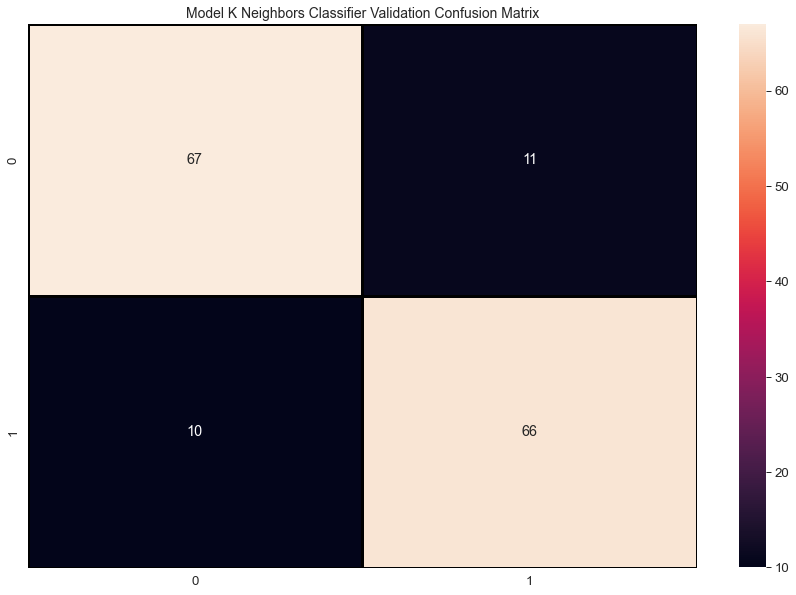

In [154]:
print('Model K Neighbors Classifier Validation Classification Report:\n ', classification_report(y_test, knn_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, knn_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model K Neighbors Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Naive Bayes Classifier 

Model Naive Bayes Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.784     0.885     0.831        78
           1      0.864     0.750     0.803        76

    accuracy                          0.818       154
   macro avg      0.824     0.817     0.817       154
weighted avg      0.823     0.818     0.817       154



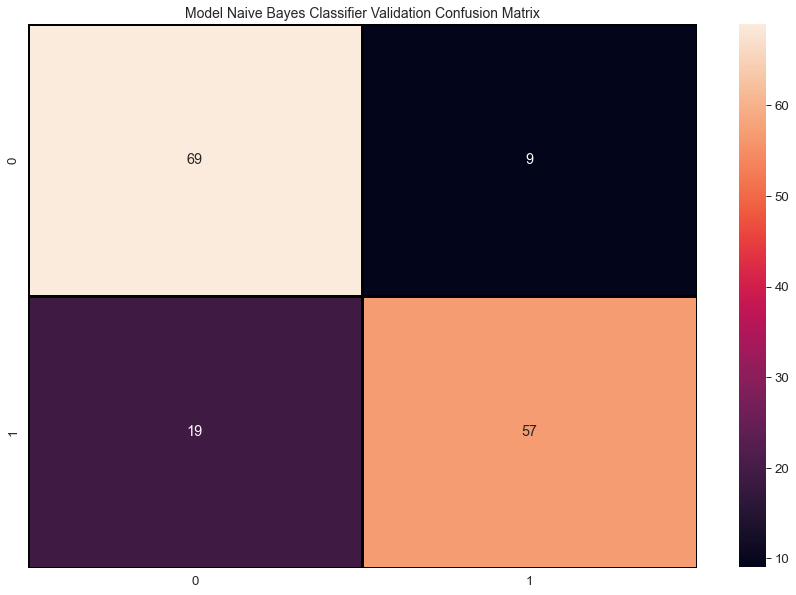

In [155]:
print('Model Naive Bayes Classifier Validation Classification Report:\n ', classification_report(y_test, nb_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, nb_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Naive Bayes Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Naive Bayes Classifier for Multivariate Bernoulli

Model Naive Bayes Classifier for Multivariate Bernoulli Validation Classification Report:
                precision    recall  f1-score   support

           0      0.896     0.885     0.890        78
           1      0.883     0.895     0.889        76

    accuracy                          0.890       154
   macro avg      0.890     0.890     0.890       154
weighted avg      0.890     0.890     0.890       154



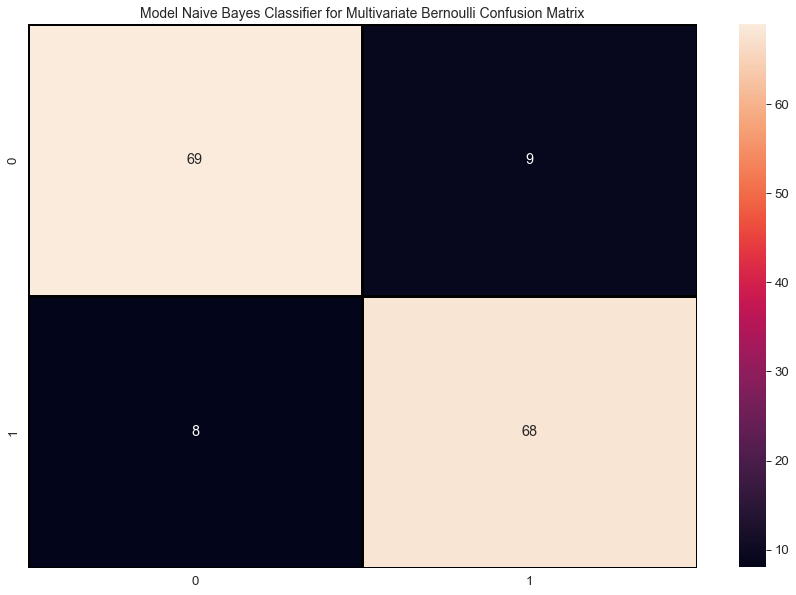

In [156]:
print('Model Naive Bayes Classifier for Multivariate Bernoulli Validation Classification Report:\n ', classification_report(y_test, bnb_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, bnb_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Naive Bayes Classifier for Multivariate Bernoulli Confusion Matrix",fontsize=14)
plt.show()

#### Decision Tree Classifier

Model Decision Tree Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.833     0.833     0.833        78
           1      0.829     0.829     0.829        76

    accuracy                          0.831       154
   macro avg      0.831     0.831     0.831       154
weighted avg      0.831     0.831     0.831       154



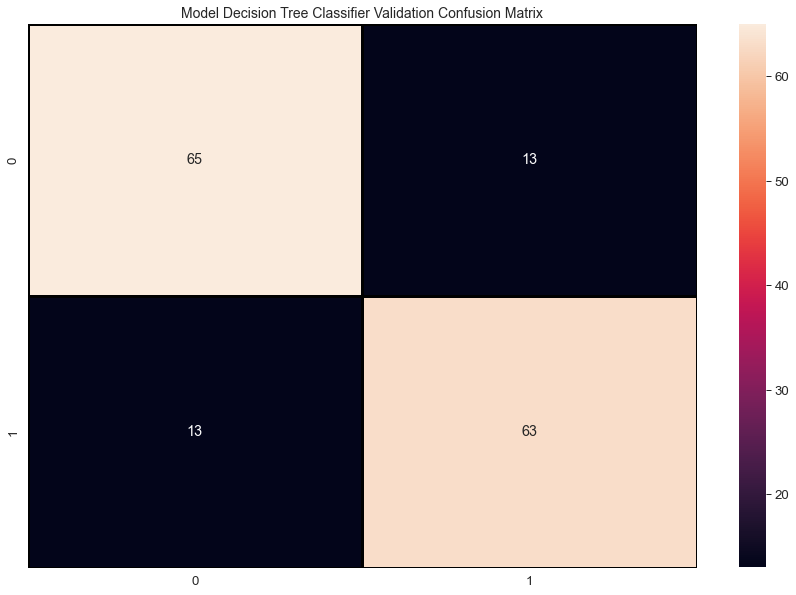

In [157]:
print('Model Decision Tree Classifier Validation Classification Report:\n ', classification_report(y_test, dt_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, dt_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Decision Tree Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Logistic Regression Classifier

Model Logistic Regression Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.921     0.897     0.909        78
           1      0.897     0.921     0.909        76

    accuracy                          0.909       154
   macro avg      0.909     0.909     0.909       154
weighted avg      0.909     0.909     0.909       154



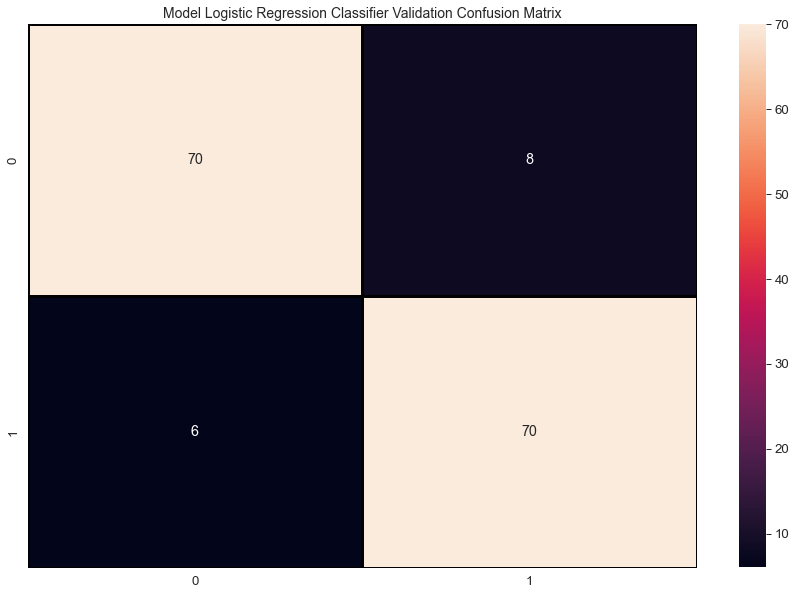

In [158]:
print('Model Logistic Regression Classifier Validation Classification Report:\n ', classification_report(y_test, lg_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lg_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Logistic Regression Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Logistic Regression CV Classifier

Model Logistic Regression CV Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.944     0.859     0.899        78
           1      0.867     0.947     0.906        76

    accuracy                          0.903       154
   macro avg      0.906     0.903     0.902       154
weighted avg      0.906     0.903     0.902       154



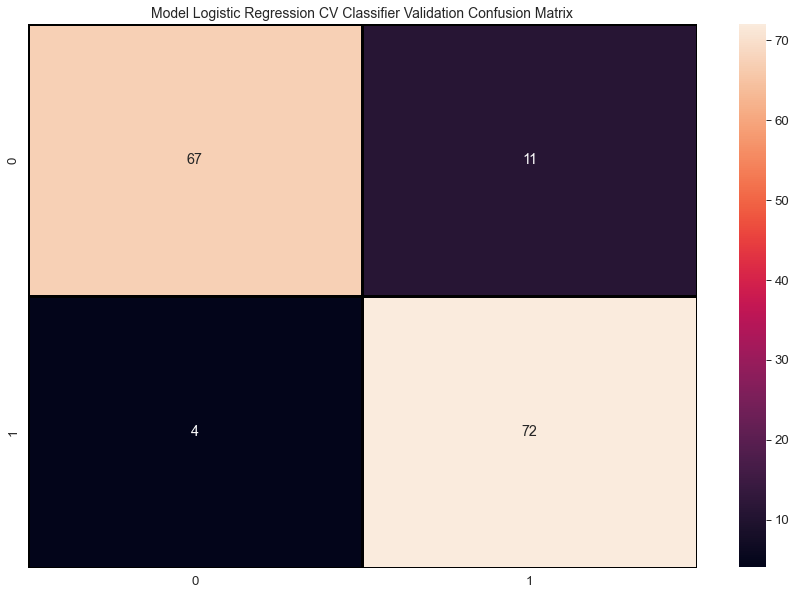

In [159]:
print('Model Logistic Regression CV Classifier Validation Classification Report:\n ', classification_report(y_test, lgcv_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lgcv_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Logistic Regression CV Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Stochastic Gradient Descent Classifier

Model Stochastic Gradient Descent Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.937     0.756     0.837        78
           1      0.791     0.947     0.862        76

    accuracy                          0.851       154
   macro avg      0.864     0.852     0.850       154
weighted avg      0.865     0.851     0.849       154



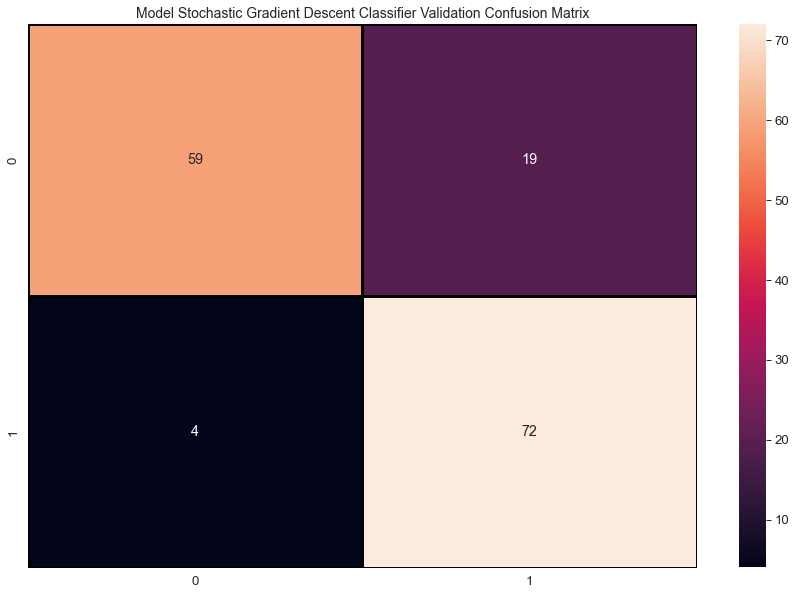

In [160]:
print('Model Stochastic Gradient Descent Classifier Validation Classification Report:\n ', classification_report(y_test, sgdc_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, sgdc_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Stochastic Gradient Descent Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Linear Perceptron Classifier

Model Linear Perceptron Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      1.000     0.731     0.844        78
           1      0.784     1.000     0.879        76

    accuracy                          0.864       154
   macro avg      0.892     0.865     0.862       154
weighted avg      0.893     0.864     0.861       154



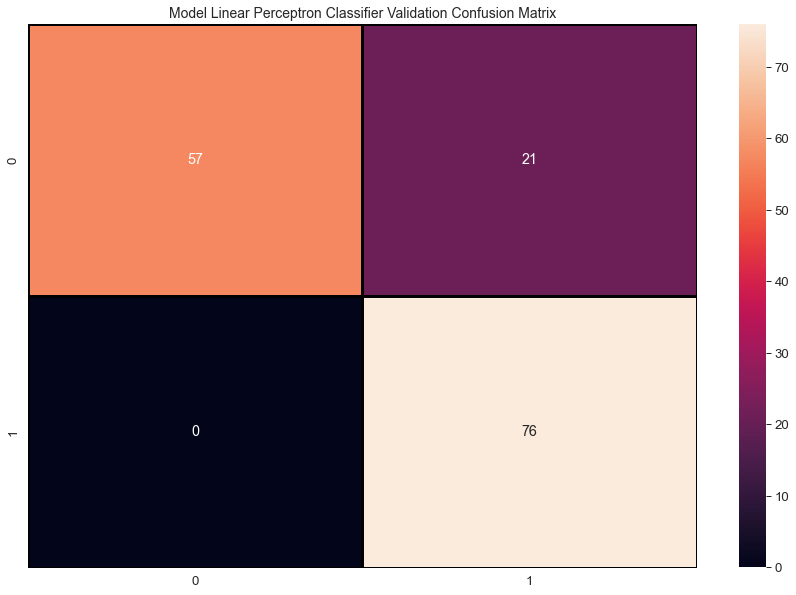

In [161]:
print('Model Linear Perceptron Classifier Validation Classification Report:\n ', classification_report(y_test, lpc_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lpc_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Linear Perceptron Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### XGBoost Classifier

Model XGBoost Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.848     0.859     0.854        78
           1      0.853     0.842     0.848        76

    accuracy                          0.851       154
   macro avg      0.851     0.851     0.851       154
weighted avg      0.851     0.851     0.851       154



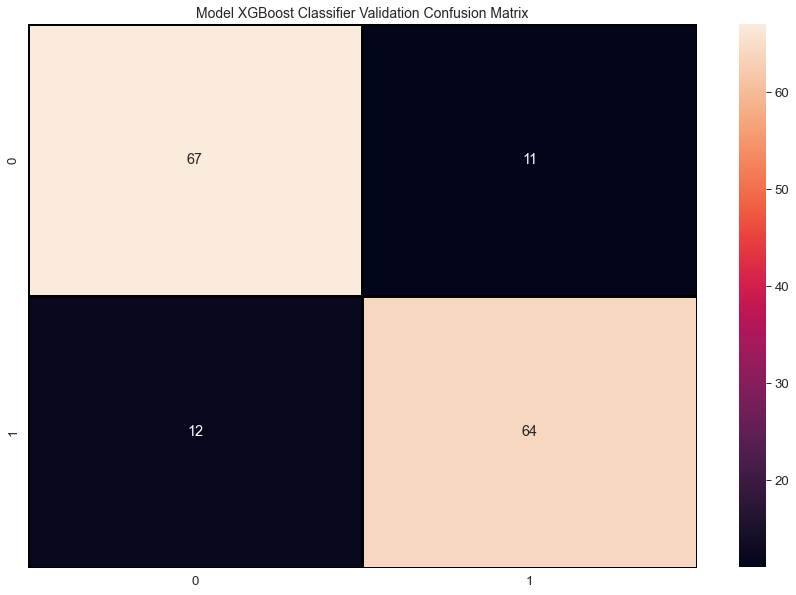

In [162]:
print('Model XGBoost Classifier Validation Classification Report:\n ', classification_report(y_test, xgb_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, xgb_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model XGBoost Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Support Vector Machines Classifier

Model Support Vector Machines Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.956     0.833     0.890        78
           1      0.849     0.961     0.901        76

    accuracy                          0.896       154
   macro avg      0.902     0.897     0.896       154
weighted avg      0.903     0.896     0.896       154



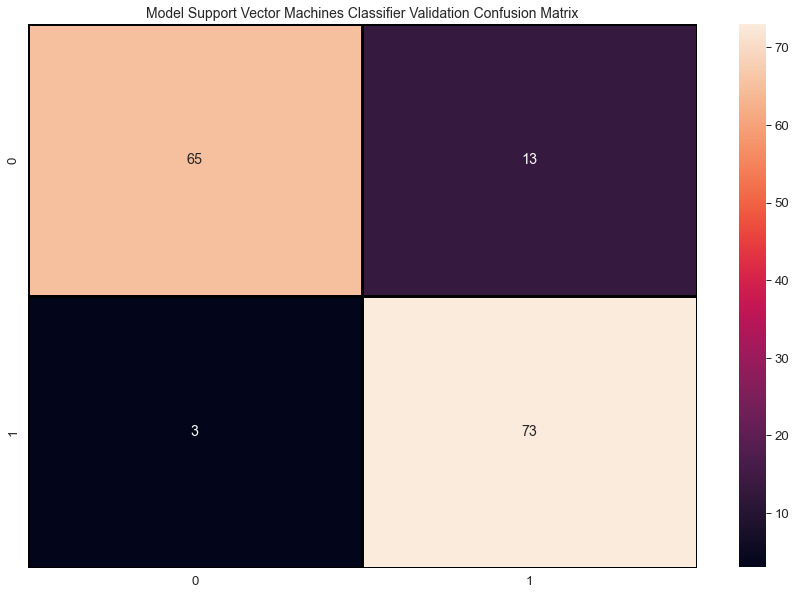

In [163]:
print('Model Support Vector Machines Classifier Validation Classification Report:\n ', classification_report(y_test, svm_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, svm_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Support Vector Machines Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Linear Support Vector Classification

Model Linear Support Vector Classificationr Validation Classification Report:
                precision    recall  f1-score   support

           0      0.932     0.872     0.901        78
           1      0.877     0.934     0.904        76

    accuracy                          0.903       154
   macro avg      0.904     0.903     0.903       154
weighted avg      0.904     0.903     0.903       154



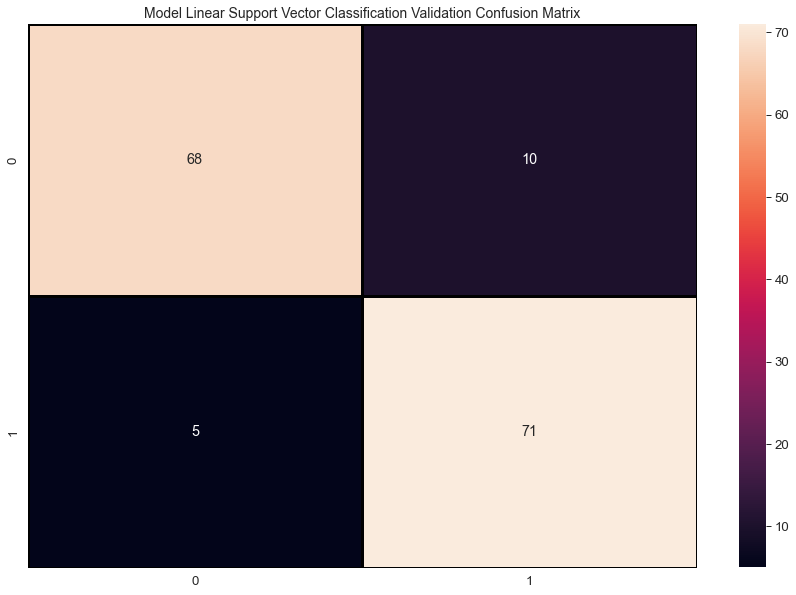

In [164]:
print('Model Linear Support Vector Classificationr Validation Classification Report:\n ', classification_report(y_test, lsvm_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lsvm_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Linear Support Vector Classification Validation Confusion Matrix",fontsize=14)
plt.show()

#### Multilayer Perceptron Classifier

Model Multilayer Perceptron Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.854     0.897     0.875        78
           1      0.889     0.842     0.865        76

    accuracy                          0.870       154
   macro avg      0.871     0.870     0.870       154
weighted avg      0.871     0.870     0.870       154



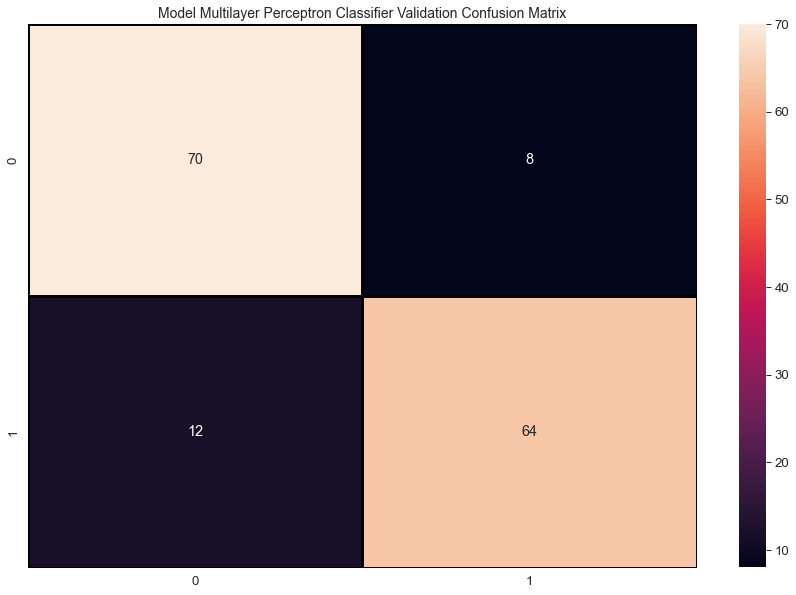

In [165]:
print('Model Multilayer Perceptron Classifier Validation Classification Report:\n ', classification_report(y_test, mlp_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, mlp_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Multilayer Perceptron Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

# 15. Machine Learning Models Optimization

##  random grid for CPU Models

### Random Forest Classifier

In [166]:
# Features which make predictions of the model better
n_estimators = [int(x) for x in np.linspace(50, 500, num = 30)]
criterion = ['gini', 'entropy', 'log_loss']
max_depth = [int(x) for x in np.linspace(1, 100, num = 20)]
max_depth.append(None)
min_samples_split = [int(x) for x in np.linspace(1, 20, num = 20)]
min_samples_leaf = [int(x) for x in np.linspace(1, 100, num = 20)]
max_features = ['sqrt', 'log2', 'auto']
max_leaf_nodes = [int(x) for x in np.linspace(1, 20, num = 10)]
max_leaf_nodes.append(None)
min_impurity_decrease = [0.0, 0.2, 0.5, 0.75]

# Features which will make the model training easier
bootstrap = [True, False]
oob_score = [False, True]
n_jobs = [-1]
random_state = [None]
verbose = [0]
warm_start = [False]
class_weight = [None, 'balanced', 'balanced_subsample']
ccp_alpha = [0.0]
max_samples = [None]

# Create the random grid
random_grid_rf = {'n_estimators': n_estimators,
            'criterion': criterion,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'max_features': max_features,
            'max_leaf_nodes' : max_leaf_nodes, 
            'min_impurity_decrease' : min_impurity_decrease,
            'bootstrap' : bootstrap,
            'oob_score' : oob_score,
            'n_jobs' : n_jobs, 
            'random_state' : random_state,
            'verbose' : verbose,
            'warm_start' : warm_start, 
            'class_weight' : class_weight,
            'ccp_alpha' : ccp_alpha,
            'max_samples' : max_samples
            }

### Gradient Boosting Classifier

In [167]:
loss = ['log_loss', 'deviance', 'exponential']
learning_rate = [0.0, 0.1, 0.2, 0.5, 0.75]
n_estimators = [int(x) for x in np.linspace(50, 500, num = 20)]
subsample = [1.0, 2.0, 4.0, 6.0, 8.0, 10.0]
criterion = ['friedman_mse', 'friedman_mse', 'squared_error', 'mse']
min_samples_split = [int(x) for x in np.linspace(1, 20, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(1, 20, num = 10)]
min_weight_fraction_leaf = [0.0, 0.1, 0.2, 0.5, 0.75]
max_depth = [int(x) for x in np.linspace(1, 100, num = 20)]
max_depth.append(None)
min_impurity_decrease = [0.0, 0.1, 0.2, 0.5, 0.75]

init = [None]
random_state = [None]
max_features = ['sqrt', 'log2', 'auto']
verbose = [0]
max_leaf_nodes = [None]
warm_start = [False]
validation_fraction = [0.1]
n_iter_no_change = [None]
tol = [0.0001]
ccp_alpha = [0.0]

# Create the random grid
random_grid_gb = {'loss': loss,
            'learning_rate': learning_rate,
            'n_estimators': n_estimators,
            'subsample': subsample,
            'criterion': criterion,
            'min_samples_split': min_samples_split,
            'min_samples_leaf' : min_samples_leaf, 
            'min_weight_fraction_leaf' : min_weight_fraction_leaf,
            'max_depth' : max_depth,
            'min_impurity_decrease' : min_impurity_decrease,
            'init' : init, 
            'random_state' : random_state,
            'max_features' : max_features,
            'verbose' : verbose, 
            'max_leaf_nodes' : max_leaf_nodes,
            'warm_start' : warm_start,
            'validation_fraction' : validation_fraction,
            'n_iter_no_change' : n_iter_no_change, 
            'tol' : tol,
            'ccp_alpha' : ccp_alpha
            }

### Histogram-based Gradient Boosting Classification Tree

In [168]:
loss= ['log_loss', 'auto', 'binary_crossentropy', 'categorical_crossentropy']
learning_rate=[0.1] 
max_iter= [int(x) for x in np.linspace(50, 100, num = 10)] 
max_leaf_nodes=[int(x) for x in np.linspace(20, 60, num = 20)] 
max_depth = [int(x) for x in np.linspace(1, 100, num = 20)] 
min_samples_leaf=[int(x) for x in np.linspace(10, 40, num = 10)]
l2_regularization=[0.0, 0.1, 0.6]
max_bins=[int(x) for x in np.linspace(100, 255, num = 20)]

categorical_features=[None] 
monotonic_cst=[None] 
warm_start=[False]
early_stopping=['auto']
scoring=['loss'] 
validation_fraction=[0.1]
n_iter_no_change=[int(x) for x in np.linspace(10, 40, num = 10)]
tol=[1e-07] 
verbose=[0]
random_state=[None]

random_grid_hgb = {'loss' : loss,
                'learning_rate' : learning_rate,
                'max_iter' : max_iter,
                'max_leaf_nodes' : max_leaf_nodes,
                'max_depth' : max_depth,
                'min_samples_leaf' : min_samples_leaf,
                'l2_regularization' : l2_regularization,
                'max_bins' : max_bins,
                'categorical_features' : categorical_features,
                'monotonic_cst' : monotonic_cst,
                'warm_start' : warm_start,
                'early_stopping' : early_stopping,
                'scoring' : scoring,
                'validation_fraction' : validation_fraction,
                'n_iter_no_change' : n_iter_no_change,
                'tol' : tol,
                'verbose' : verbose,
                'random_state' : random_state
                    }

### AdaBoost Classifier

In [169]:
base_estimator=[DecisionTreeClassifier(max_depth=1)] 
n_estimators= [int(x) for x in np.linspace(50, 500, num = 20)] 
learning_rate=[1.0] 
algorithm=['SAMME','SAMME.R'] 
random_state=[None] 

random_grid_ad = {'base_estimator' : base_estimator,
                'n_estimators' : n_estimators,
                'learning_rate' : learning_rate,
                'algorithm' : algorithm,
                'random_state' : random_state
}

### Extra Trees Classifier

In [170]:
n_estimators = [int(x) for x in np.linspace(100, 500, num = 20)]
criterion = ['gini', 'entropy', 'log_loss']
max_depth = [int(x) for x in np.linspace(1, 100, num = 20)]
max_depth.append(None)
min_samples_split = [int(x) for x in np.linspace(1, 20, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(1, 20, num = 10)]
min_weight_fraction_leaf = [0.0]
max_features = ['sqrt', 'log2', None]
max_leaf_nodes = [int(x) for x in np.linspace(1, 20, num = 10)]
#max_leaf_nodes.append(None)

min_impurity_decrease=[0.0]
bootstrap=[False] 
oob_score=[True,False] 
n_jobs=[None] 
random_state=[None] 
verbose=[0] 
warm_start=[False] 
class_weight=['balanced', 'balanced_subsample', None] 
ccp_alpha=[0.0] 
max_samples = [int(x) for x in np.linspace(1, 20, num = 10)] 
max_samples.append(None)

random_grid_et = {'n_estimators' : n_estimators,
                'criterion' : criterion,
                'max_depth' : max_depth,
                'min_samples_split' : min_samples_split,
                'min_samples_leaf' : min_samples_leaf,
                'min_weight_fraction_leaf' : min_weight_fraction_leaf,
                'max_features' : max_features,
                'max_leaf_nodes' : max_leaf_nodes,
                'min_impurity_decrease' : min_impurity_decrease,
                'bootstrap' : bootstrap,
                'oob_score' : oob_score,
                'n_jobs' : n_jobs,
                'random_state' : random_state,
                'verbose' : verbose,
                'warm_start': warm_start,
                'class_weight' : class_weight,
                'ccp_alpha' : ccp_alpha,
                'max_samples' : max_samples
}

### K Neighbors Classifier

In [171]:
n_neighbors = [int(x) for x in np.linspace(1, 10, num = 10)]
weights = ['uniform', 'distance'] 
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [int(x) for x in np.linspace(10, 50, num = 10)]
p = [int(x) for x in np.linspace(1, 10, num = 10)]
metric = ['minkowski'] 
metric_params=[None] 
n_jobs=[None]

random_grid_knn = {'n_neighbors' : n_neighbors,
                'weights' : weights,
                'algorithm' : algorithm,
                'leaf_size' : leaf_size,
                'p' : p,
                'metric' : metric,
                'metric_params' : metric_params,
                'n_jobs' : n_jobs
}

### Decision Tree Classifier

In [172]:
criterion = ['gini','entropy', 'log_loss'] 
splitter = ['best', 'random'] 
max_depth = [int(x) for x in np.linspace(1, 100, num = 20)] 
max_depth.append(None)
min_samples_split = [int(x) for x in np.linspace(1, 20, num = 10)] 
min_samples_leaf = [int(x) for x in np.linspace(1, 20, num = 10)] 
min_weight_fraction_leaf = [0.0] 
max_features = [None, 'auto', 'log2'] 
random_state = [None] 
max_leaf_nodes = [int(x) for x in np.linspace(1, 20, num = 10)]
max_leaf_nodes.append(None)

min_impurity_decrease=[0.0] 
class_weight=[None] 
ccp_alpha=[0.0] 

random_grid_dt = {'criterion' : criterion,
                'splitter' : splitter,
                'max_depth' : max_depth,
                'min_samples_split' : min_samples_split,
                'min_samples_leaf' : min_samples_leaf,
                'min_weight_fraction_leaf' : min_weight_fraction_leaf,
                'max_features' : max_features,
                'random_state' : random_state,
                'max_leaf_nodes' : max_leaf_nodes, 
                'min_impurity_decrease' : min_impurity_decrease,
                'class_weight' : class_weight,
                'ccp_alpha' : ccp_alpha                
}

### Logistic Regression Classifiers

In [173]:
penalty = ['l2','l1', '‘elasticnet'] 
dual = [False, True]
tol = [0.0001] 
C = [1.0] 
fit_intercept = [True, False]
intercept_scaling = [1]
class_weight = [None, 'balanced']
random_state = [None] 
solver = ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'] 
max_iter = [int(x) for x in np.linspace(50, 250, num = 10)]  
multi_class = ['auto', 'ovr', 'multinomial'] 
verbose = [0] 
warm_start = [False] 
n_jobs = [None] 
l1_ratio = [None]

random_grid_lg = {'penalty' : penalty,
                'dual' : dual,
                'tol' : tol,
                'C' : C,
                'fit_intercept' : fit_intercept,
                'intercept_scaling' : intercept_scaling,
                'class_weight' : class_weight,
                'random_state' : random_state,
                'solver' : solver,
                'max_iter' : max_iter,
                'multi_class' : multi_class,
                'verbose' : verbose,
                'warm_start' : warm_start,
                'n_jobs' : n_jobs,
                'l1_ratio' : l1_ratio
}

### Logistic Regression CV Classifier

In [174]:
Cs = [int(x) for x in np.linspace(5, 50, num = 10)] 
fit_intercept = [True, False] 
cv = [int(x) for x in np.linspace(3, 7, num = 5)] 
dual = [False, False]
penalty = ['l2', 'l1', 'elasticnet'] 
scoring = [None] 
solver=['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
tol = [0.0001] 
max_iter = [100] 
class_weight = [None, 'balanced'] 
n_jobs = [None] 
verbose = [0] 
refit = [True] 
intercept_scaling = [1.0] 
multi_class = ['auto', 'ovr', 'multinomial'] 
random_state = [None]
l1_ratios = [None]

random_grid_lgcv = {'Cs' : Cs,
                'fit_intercept' : fit_intercept,
                'cv' : cv,
                'dual' : dual,
                'penalty' : penalty,
                'scoring' : scoring,
                'solver' : solver,
                'tol' : tol,
                'max_iter' : max_iter,
                'class_weight' : class_weight,
                'n_jobs' : n_jobs,
                'verbose' : verbose,
                'refit' : refit,
                'intercept_scaling' : intercept_scaling,
                'multi_class' : multi_class,
                'random_state' : random_state,
                'l1_ratios' : l1_ratios
}

### Stochastic Gradient Descent Classifier

In [175]:
loss=['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
penalty=['l2', 'l1', 'elasticnet'] 
alpha=[0.0001]
l1_ratio=[0.15] 
fit_intercept=[True, False] 
max_iter = [int(x) for x in np.linspace(900, 5000, num = 15)]
tol=[0.001]
shuffle=[True, False] 
verbose=[0] 
epsilon=[0.1] 
n_jobs=[None] 
random_state=[None] 
learning_rate=['optimal'] 
eta0 = [0.0] 
power_t = [0.5] 
early_stopping=[False, True]
validation_fraction=[0.1]
n_iter_no_change = [int(x) for x in np.linspace(3, 25, num = 15)] 
class_weight=[None, 'balanced'] 
warm_start=[False]
average=[False]

random_grid_sgdc = {'loss' : loss,
                'penalty' : penalty, 
                'alpha' : alpha, 
                'l1_ratio' : l1_ratio,
                'fit_intercept' : fit_intercept,
                'max_iter' : max_iter,
                'tol' : tol, 
                'shuffle' : shuffle, 
                'verbose' : verbose,
                'epsilon' : epsilon, 
                'n_jobs' : n_jobs, 
                'random_state' : random_state, 
                'learning_rate' : learning_rate, 
                'eta0' : eta0,
                'power_t' : power_t, 
                'early_stopping' : early_stopping,
                'validation_fraction' : validation_fraction, 
                'n_iter_no_change' : n_iter_no_change,
                'class_weight' : class_weight,
                'warm_start' : warm_start,
                'average' : average
}

### Linear Perceptron Classifier

In [176]:
penalty = [None, 'l2', 'l1'] 
alpha = [0.0001] 
l1_ratio = [0.15] 
fit_intercept=[True, False]
max_iter = [int(x) for x in np.linspace(900, 5000, num = 15)]
tol=[0.001] 
shuffle=[True] 
verbose=[0] 
eta0=[1.0] 
n_jobs=[None] 
random_state=[0] 
early_stopping=[False] 
validation_fraction=[0.1] 
n_iter_no_change=[5]
class_weight=[None] 
warm_start=[False]

random_grid_lpc = {'penalty' : penalty,
                'alpha' : alpha,
                'l1_ratio' : l1_ratio,
                'fit_intercept' : fit_intercept,
                'max_iter' : max_iter,
                'tol' : tol,
                'shuffle' : shuffle,
                'verbose' : verbose,
                'eta0' : eta0,
                'n_jobs' : n_jobs,
                'random_state' : random_state,
                'early_stopping' : early_stopping,
                'validation_fraction' : validation_fraction,
                'n_iter_no_change' : n_iter_no_change,
                'class_weight' : class_weight,
                'warm_start' : warm_start,
}

### Support Vector Machines Classifiers

In [177]:
C=[1.0]
kernel=['rbf', 'linear', 'poly', 'sigmoid']
degree = [int(x) for x in np.linspace(1, 15, num = 10)] 
gamma = ['scale', 'auto']
coef0=[0.0] 
shrinking=[True, False] 
probability=[False, True] 
tol=[0.001]
cache_size=[int(x) for x in np.linspace(750, 600, num = 20)]
class_weight=[None, 'balanced'] 
verbose=[False] 
max_iter=  [int(x) for x in np.linspace(-5, 5, num = 8)] 
decision_function_shape=['ovr', 'ovo'] 
break_ties=[False] 
random_state=[None]

random_grid_svm = {'C' : C,
                'kernel' : kernel,
                'degree' : degree,
                'gamma' : gamma,
                'coef0' : coef0,
                'shrinking' : shrinking,
                'probability' : probability,
                'tol' : tol,
                'cache_size' : cache_size,
                'class_weight': class_weight,
                'verbose' : verbose,
                'max_iter' : max_iter,
                'decision_function_shape' : decision_function_shape,
                'break_ties' : break_ties,
                'random_state' : random_state
}

### Linear Support Vector Classification

In [178]:
penalty = ['l2', 'l1']
loss = ['squared_hinge', 'hinge']
dual=[True, False]
tol=[0.0001]
C=[1.0] 
multi_class=['ovr', 'crammer_singer'] 
fit_intercept=[True, False] 
intercept_scaling = [int(x) for x in np.linspace(1, 10, num = 10)] 
class_weight=[None] 
verbose=[0]
random_state=[None]
max_iter=[int(x) for x in np.linspace(600, 8000, num = 30)]

random_grid_lsvm = {'penalty' : penalty,
                'loss' : loss, 
                'dual' : dual,
                'tol' : tol,
                'C' : C,
                'multi_class' : multi_class,
                'fit_intercept' : fit_intercept,
                'intercept_scaling' : intercept_scaling,
                'class_weight' : class_weight,
                'verbose' : verbose,
                'random_state' : random_state,
                'max_iter' : max_iter
}
    

## Hyperparameters using CPU

In [179]:
'''
        Random Forest Classifier
'''

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(rf, random_grid_rf, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'ccp_alpha': [0.0],
                                        'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 6, 11, 16, 21, 27, 32,
                                                      37, 42, 47, 53, 58, 63,
                                                      68, 73, 79, 84, 89, 94,
                                                      100, None],
                                        'max_features': ['sqrt', 'log2',
                                                         'a...
                                                             27, 32, 37, 42, 47,
                                                             53, 58, 63, 68, 73,
                                                             79, 84, 89, 94,
                                                             100],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                              12, 13, 14, 15,
                                                              16, 17, 18, 19,
                                                              20],
                                        'n_estimators': [50, 65, 81, 96, 112,
                                                         127, 143, 158, 174,
                                                         189, 205, 220, 236,
                                                         251, 267, 282, 298,
                                                         313, 329, 344, 360,
                                                         375, 391, 406, 422,
                                                         437, 453, 468, 484,
                                                         500],
                                        'n_jobs': [-1],
                                        'oob_score': [False, True],
                                        'random_state': [None], 'verbose': [0],
                                        'warm_start': [False]})

In [180]:
'''
        Gradient Boosting Classifier
'''

gb = GradientBoostingClassifier()

gb_random = RandomizedSearchCV(gb, random_grid_gb, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
gb_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.0],
                                        'criterion': ['friedman_mse',
                                                      'friedman_mse',
                                                      'squared_error', 'mse'],
                                        'init': [None],
                                        'learning_rate': [0.0, 0.1, 0.2, 0.5,
                                                          0.75],
                                        'loss': ['log_loss', 'deviance',
                                                 'exponential'],
                                        'max_depth': [1, 6, 11, 16, 21, 27, 32,
                                                      37, 42, 47, 53, 58, 63,
                                                      68, 73, 79, 84, 8...
                                        'min_samples_split': [1, 3, 5, 7, 9, 11,
                                                              13, 15, 17, 20],
                                        'min_weight_fraction_leaf': [0.0, 0.1,
                                                                     0.2, 0.5,
                                                                     0.75],
                                        'n_estimators': [50, 73, 97, 121, 144,
                                                         168, 192, 215, 239,
                                                         263, 286, 310, 334,
                                                         357, 381, 405, 428,
                                                         452, 476, 500],
                                        'n_iter_no_change': [None],
                                        'random_state': [None],
                                        'subsample': [1.0, 2.0, 4.0, 6.0, 8.0,
                                                      10.0],
                                        'tol': [0.0001],
                                        'validation_fraction': [0.1],
                                        'verbose': [0], 'warm_start': [False]})

In [181]:
'''
        Histogram-based Gradient Boosting Classification Tree
'''

hgb = HistGradientBoostingClassifier()

hgb_random = RandomizedSearchCV(hgb, random_grid_hgb, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
hgb_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=HistGradientBoostingClassifier(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'categorical_features': [None],
                                        'early_stopping': ['auto'],
                                        'l2_regularization': [0.0, 0.1, 0.6],
                                        'learning_rate': [0.1],
                                        'loss': ['log_loss', 'auto',
                                                 'binary_crossentropy',
                                                 'categorical_crossentropy'],
                                        'max_bins': [100, 108, 116, 124, 132,
                                                     140, 148, 157, 165, 173,
                                                     1...
                                        'max_iter': [50, 55, 61, 66, 72, 77, 83,
                                                     88, 94, 100],
                                        'max_leaf_nodes': [20, 22, 24, 26, 28,
                                                           30, 32, 34, 36, 38,
                                                           41, 43, 45, 47, 49,
                                                           51, 53, 55, 57, 60],
                                        'min_samples_leaf': [10, 13, 16, 20, 23,
                                                             26, 30, 33, 36,
                                                             40],
                                        'monotonic_cst': [None],
                                        'n_iter_no_change': [10, 13, 16, 20, 23,
                                                             26, 30, 33, 36,
                                                             40],
                                        'random_state': [None],
                                        'scoring': ['loss'], 'tol': [1e-07],
                                        'validation_fraction': [0.1],
                                        'verbose': [0], 'warm_start': [False]})

In [182]:
'''
        AdaBoost Classifier
'''

ad = AdaBoostClassifier()

ad_random = RandomizedSearchCV(ad, random_grid_ad, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
ad_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=AdaBoostClassifier(), n_iter=150, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'base_estimator': [DecisionTreeClassifier(max_depth=1)],
                                        'learning_rate': [1.0],
                                        'n_estimators': [50, 73, 97, 121, 144,
                                                         168, 192, 215, 239,
                                                         263, 286, 310, 334,
                                                         357, 381, 405, 428,
                                                         452, 476, 500],
                                        'random_state': [None]})

In [183]:
'''   
        Extra Trees Classifier
'''

et = ExtraTreesClassifier()

et_random = RandomizedSearchCV(et, random_grid_et, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
et_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [False],
                                        'ccp_alpha': [0.0],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample',
                                                         None],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 6, 11, 16, 21, 27, 32,
                                                      37, 42, 47, 53, 58, 63,
                                                      68, 73, 79, 84, 89, 94,
                                                      100, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'ma...
                                        'min_impurity_decrease': [0.0],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                                             13, 15, 17, 20],
                                        'min_samples_split': [1, 3, 5, 7, 9, 11,
                                                              13, 15, 17, 20],
                                        'min_weight_fraction_leaf': [0.0],
                                        'n_estimators': [100, 121, 142, 163,
                                                         184, 205, 226, 247,
                                                         268, 289, 310, 331,
                                                         352, 373, 394, 415,
                                                         436, 457, 478, 500],
                                        'n_jobs': [None],
                                        'oob_score': [True, False],
                                        'random_state': [None], 'verbose': [0],
                                        'warm_start': [False]})

In [184]:
'''   
        K Neighbors Classifier
'''

knn = KNeighborsClassifier()

knn_random = RandomizedSearchCV(knn, random_grid_knn, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
knn_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [10, 14, 18, 23, 27, 32,
                                                      36, 41, 45, 50],
                                        'metric': ['minkowski'],
                                        'metric_params': [None],
                                        'n_jobs': [None],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10],
                                        'p': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                        'weights': ['uniform', 'distance']})

In [185]:
'''
            Decision Tree Classifier
'''

dt = DecisionTreeClassifier()

dt_random = RandomizedSearchCV(dt, random_grid_dt, n_iter=300, cv = 3, n_jobs = -1)

# Fit the random search model
dt_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=300,
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.0],
                                        'class_weight': [None],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 6, 11, 16, 21, 27, 32,
                                                      37, 42, 47, 53, 58, 63,
                                                      68, 73, 79, 84, 89, 94,
                                                      100, None],
                                        'max_features': [None, 'auto', 'log2'],
                                        'max_leaf_nodes': [1, 3, 5, 7, 9, 11,
                                                           13, 15, 17, 20,
                                                           None],
                                        'min_impurity_decrease': [0.0],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                                             13, 15, 17, 20],
                                        'min_samples_split': [1, 3, 5, 7, 9, 11,
                                                              13, 15, 17, 20],
                                        'min_weight_fraction_leaf': [0.0],
                                        'random_state': [None],
                                        'splitter': ['best', 'random']})

In [186]:
'''
            Logistic Regression Classifiers
'''

lg = LogisticRegression()

lg_random = RandomizedSearchCV(lg, random_grid_lg, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
lg_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=150, n_jobs=-1,
                   param_distributions={'C': [1.0],
                                        'class_weight': [None, 'balanced'],
                                        'dual': [False, True],
                                        'fit_intercept': [True, False],
                                        'intercept_scaling': [1],
                                        'l1_ratio': [None],
                                        'max_iter': [50, 72, 94, 116, 138, 161,
                                                     183, 205, 227, 250],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'n_jobs': [None],
                                        'penalty': ['l2', 'l1', '‘elasticnet'],
                                        'random_state': [None],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear', 'sag', 'saga'],
                                        'tol': [0.0001], 'verbose': [0],
                                        'warm_start': [False]})

In [187]:
'''
            Logistic Regression CV Classifier
'''

lgcv = LogisticRegressionCV()

lgcv_random = RandomizedSearchCV(lgcv, random_grid_lgcv, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
lgcv_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=LogisticRegressionCV(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'Cs': [5, 10, 15, 20, 25, 30, 35, 40,
                                               45, 50],
                                        'class_weight': [None, 'balanced'],
                                        'cv': [3, 4, 5, 6, 7],
                                        'dual': [False, False],
                                        'fit_intercept': [True, False],
                                        'intercept_scaling': [1.0],
                                        'l1_ratios': [None], 'max_iter': [100],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'n_jobs': [None],
                                        'penalty': ['l2', 'l1', 'elasticnet'],
                                        'random_state': [None], 'refit': [True],
                                        'scoring': [None],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear', 'sag', 'saga'],
                                        'tol': [0.0001], 'verbose': [0]})

In [188]:
'''
            Stochastic Gradient Descent Classifier
'''

sgdc = SGDClassifier()

sgdc_random = RandomizedSearchCV(sgdc, random_grid_sgdc, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
sgdc_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=SGDClassifier(), n_iter=150, n_jobs=-1,
                   param_distributions={'alpha': [0.0001], 'average': [False],
                                        'class_weight': [None, 'balanced'],
                                        'early_stopping': [False, True],
                                        'epsilon': [0.1], 'eta0': [0.0],
                                        'fit_intercept': [True, False],
                                        'l1_ratio': [0.15],
                                        'learning_rate': ['optimal'],
                                        'loss': ['hinge', 'log_loss', 'log',
                                                 'modified_huber',
                                                 'squar...
                                                 'squared_epsilon_insensitive'],
                                        'max_iter': [900, 1192, 1485, 1778,
                                                     2071, 2364, 2657, 2950,
                                                     3242, 3535, 3828, 4121,
                                                     4414, 4707, 5000],
                                        'n_iter_no_change': [3, 4, 6, 7, 9, 10,
                                                             12, 14, 15, 17, 18,
                                                             20, 21, 23, 25],
                                        'n_jobs': [None],
                                        'penalty': ['l2', 'l1', 'elasticnet'],
                                        'power_t': [0.5],
                                        'random_state': [None],
                                        'shuffle': [True, False],
                                        'tol': [0.001],
                                        'validation_fraction': [0.1],
                                        'verbose': [0], 'warm_start': [False]})

In [189]:
'''
            Linear Perceptron Classifier
'''

lpc = Perceptron()

lpc_random = RandomizedSearchCV(lpc, random_grid_lpc, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
lpc_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=Perceptron(), n_iter=150, n_jobs=-1,
                   param_distributions={'alpha': [0.0001],
                                        'class_weight': [None],
                                        'early_stopping': [False],
                                        'eta0': [1.0],
                                        'fit_intercept': [True, False],
                                        'l1_ratio': [0.15],
                                        'max_iter': [900, 1192, 1485, 1778,
                                                     2071, 2364, 2657, 2950,
                                                     3242, 3535, 3828, 4121,
                                                     4414, 4707, 5000],
                                        'n_iter_no_change': [5],
                                        'n_jobs': [None],
                                        'penalty': [None, 'l2', 'l1'],
                                        'random_state': [0], 'shuffle': [True],
                                        'tol': [0.001],
                                        'validation_fraction': [0.1],
                                        'verbose': [0], 'warm_start': [False]})

In [190]:
'''
            Support Vector Machines Classifiers
'''

svm = SVC()

svm_random = RandomizedSearchCV(svm, random_grid_svm, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
svm_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=150, n_jobs=-1,
                   param_distributions={'C': [1.0], 'break_ties': [False],
                                        'cache_size': [750, 742, 734, 726, 718,
                                                       710, 702, 694, 686, 678,
                                                       671, 663, 655, 647, 639,
                                                       631, 623, 615, 607,
                                                       600],
                                        'class_weight': [None, 'balanced'],
                                        'coef0': [0.0],
                                        'decision_function_shape': ['ovr',
                                                                    'ovo'],
                                        'degree': [1, 2, 4, 5, 7, 8, 10, 11, 13,
                                                   15],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['rbf', 'linear', 'poly',
                                                   'sigmoid'],
                                        'max_iter': [-5, -3, -2, 0, 0, 2, 3, 5],
                                        'probability': [False, True],
                                        'random_state': [None],
                                        'shrinking': [True, False],
                                        'tol': [0.001], 'verbose': [False]})

In [191]:
'''
            Linear Support Vector Classification
'''

lsvm = LinearSVC()

lsvm_random = RandomizedSearchCV(lsvm, random_grid_lsvm, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
lsvm_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=LinearSVC(), n_iter=150, n_jobs=-1,
                   param_distributions={'C': [1.0], 'class_weight': [None],
                                        'dual': [True, False],
                                        'fit_intercept': [True, False],
                                        'intercept_scaling': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10],
                                        'loss': ['squared_hinge', 'hinge'],
                                        'max_iter': [600, 855, 1110, 1365, 1620,
                                                     1875, 2131, 2386, 2641,
                                                     2896, 3151, 3406, 3662,
                                                     3917, 4172, 4427, 4682,
                                                     4937, 5193, 5448, 5703,
                                                     5958, 6213, 6468, 6724,
                                                     6979, 7234, 7489, 7744,
                                                     8000],
                                        'multi_class': ['ovr',
                                                        'crammer_singer'],
                                        'penalty': ['l2', 'l1'],
                                        'random_state': [None], 'tol': [0.0001],
                                        'verbose': [0]})

## Build the Optmization Models Using CPU

In [192]:
# Random Forest Classifier
rf_op_m_1_cpu = rf_random.best_estimator_

print('Parameters currently in use:\n')
print(rf_op_m_1_cpu.get_params())

Parameters currently in use:

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 18, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 96, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [193]:
# Gradient Boosting Classifier
gb_op_m_1_cpu = gb_random.best_estimator_

print('Parameters currently in use:\n')
print(gb_op_m_1_cpu.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0, 'criterion': 'mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 84, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 263, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [194]:
# Histogram-based Gradient Boosting Classification Tree
hgb_op_m_1_cpu = hgb_random.best_estimator_

print('Parameters currently in use:\n')
print(hgb_op_m_1_cpu.get_params())

Parameters currently in use:

{'categorical_features': None, 'early_stopping': 'auto', 'l2_regularization': 0.6, 'learning_rate': 0.1, 'loss': 'binary_crossentropy', 'max_bins': 108, 'max_depth': 68, 'max_iter': 77, 'max_leaf_nodes': 57, 'min_samples_leaf': 20, 'monotonic_cst': None, 'n_iter_no_change': 26, 'random_state': None, 'scoring': 'loss', 'tol': 1e-07, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [195]:
# AdaBoost Classifier
ad_op_m_1_cpu = ad_random.best_estimator_

print('Parameters currently in use:\n')
print(ad_op_m_1_cpu.get_params())

Parameters currently in use:

{'algorithm': 'SAMME', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 1.0, 'n_estimators': 97, 'random_state': None}


In [196]:
# Extra Trees Classifier
et_op_m_1_cpu = et_random.best_estimator_

print('Parameters currently in use:\n')
print(et_op_m_1_cpu.get_params())

Parameters currently in use:

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 27, 'max_features': 'log2', 'max_leaf_nodes': 5, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 17, 'min_samples_split': 15, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [197]:
# K Neighbors Classifier
knn_op_m_1_cpu = knn_random.best_estimator_

print('Parameters currently in use:\n')
print(knn_op_m_1_cpu.get_params())

Parameters currently in use:

{'algorithm': 'auto', 'leaf_size': 27, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


In [198]:
# Decision Tree Classifier
dt_op_m_1_cpu = dt_random.best_estimator_

print('Parameters currently in use:\n')
print(dt_op_m_1_cpu.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'log_loss', 'max_depth': 27, 'max_features': None, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 7, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'random'}


In [199]:
# Logistic Regression Classifiers
lg_op_m_1_cpu = lg_random.best_estimator_

print('Parameters currently in use:\n')
print(lg_op_m_1_cpu.get_params())

Parameters currently in use:

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': False, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 50, 'multi_class': 'ovr', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [200]:
# Logistic Regression CV Classifier
lgcv_op_m_1_cpu = lgcv_random.best_estimator_

print('Parameters currently in use:\n')
print(lgcv_op_m_1_cpu.get_params())

Parameters currently in use:

{'Cs': 35, 'class_weight': None, 'cv': 4, 'dual': False, 'fit_intercept': False, 'intercept_scaling': 1.0, 'l1_ratios': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'refit': True, 'scoring': None, 'solver': 'sag', 'tol': 0.0001, 'verbose': 0}


In [201]:
# Stochastic Gradient Descent Classifier
sgdc_op_m_1_cpu = sgdc_random.best_estimator_

print('Parameters currently in use:\n')
print(sgdc_op_m_1_cpu.get_params())

Parameters currently in use:

{'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': True, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': False, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'huber', 'max_iter': 3828, 'n_iter_no_change': 9, 'n_jobs': None, 'penalty': 'l1', 'power_t': 0.5, 'random_state': None, 'shuffle': False, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [202]:
# Linear Perceptron Classifier
lpc_op_m_1_cpu = lpc_random.best_estimator_

print('Parameters currently in use:\n')
print(lpc_op_m_1_cpu.get_params())

Parameters currently in use:

{'alpha': 0.0001, 'class_weight': None, 'early_stopping': False, 'eta0': 1.0, 'fit_intercept': False, 'l1_ratio': 0.15, 'max_iter': 900, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [203]:
# Support Vector Machines Classifiers
svm_op_m_1_cpu = svm_random.best_estimator_

print('Parameters currently in use:\n')
print(svm_op_m_1_cpu.get_params())

Parameters currently in use:

{'C': 1.0, 'break_ties': False, 'cache_size': 655, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 15, 'gamma': 'scale', 'kernel': 'sigmoid', 'max_iter': 5, 'probability': False, 'random_state': None, 'shrinking': False, 'tol': 0.001, 'verbose': False}


In [204]:
# Linear Support Vector Classification
lsvm_op_m_1_cpu = lsvm_random.best_estimator_

print('Parameters currently in use:\n')
print(lsvm_op_m_1_cpu.get_params())

Parameters currently in use:

{'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 6, 'loss': 'hinge', 'max_iter': 2131, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


## Predict y_test Using CPU

In [205]:
# Random Forest Classifier
rf_op_m_1_pred_vaild_cpu = rf_op_m_1_cpu.predict(X_test)

# Gradient Boosting Classifier
gb_op_m_1_pred_vaild_cpu = gb_op_m_1_cpu.predict(X_test)

# Histogram-based Gradient Boosting Classification Tree
hgb_op_m_1_pred_vaild_cpu = hgb_op_m_1_cpu.predict(X_test)

# AdaBoost Classifier
ad_op_m_1_pred_vaild_cpu = ad_op_m_1_cpu.predict(X_test)

# Extra Trees Classifier
et_op_m_1_pred_vaild_cpu = et_op_m_1_cpu.predict(X_test)

# K Neighbors Classifier
knn_op_m_1_pred_vaild_cpu = knn_op_m_1_cpu.predict(X_test)

# Decision Tree Classifier
dt_op_m_1_pred_vaild_cpu = dt_op_m_1_cpu.predict(X_test)

# Logistic Regression Classifier
lg_op_m_1_pred_vaild_cpu = lg_op_m_1_cpu.predict(X_test)

# Logistic Regression CV Classifier
lgcv_op_m_1_pred_vaild_cpu =  lgcv_op_m_1_cpu.predict(X_test)

# Stochastic Gradient Descent Classifier
sgdc_op_m_1_pred_vaild_cpu =  sgdc_op_m_1_cpu.predict(X_test)

# Linear Perceptron Classifier
lpc_op_m_1_pred_vaild_cpu =  lpc_op_m_1_cpu.predict(X_test)

# Support Vector Machines Classifiers
svm_op_m_1_pred_vaild_cpu = svm_op_m_1_cpu.predict(X_test)

# Linear Support Vector Classification
lsvm_op_m_1_pred_vaild_cpu = lsvm_op_m_1_cpu.predict(X_test)

## Evaluate the Models CPU

### Accuracy Score

In [206]:
# Random Forest Classifier
Valid_accuracy_rf_op_m_1_cpu = accuracy_score(y_test, rf_op_m_1_pred_vaild_cpu)

# Gradient Boosting Classifier
Valid_accuracy_gb_op_m_1_cpu = accuracy_score(y_test, gb_op_m_1_pred_vaild_cpu)

# Histogram-based Gradient Boosting Classification Tree
Valid_accuracy_hgb_op_m_1_cpu = accuracy_score(y_test, hgb_op_m_1_pred_vaild_cpu)

# AdaBoost Classifier
Valid_accuracy_ad_op_m_1_cpu = accuracy_score(y_test, ad_op_m_1_pred_vaild_cpu)

# Extra Trees Classifier
Valid_accuracy_et_op_m_1_cpu = accuracy_score(y_test, et_op_m_1_pred_vaild_cpu)

# K Neighbors Classifier
Valid_accuracy_knn_op_m_1_cpu = accuracy_score(y_test, knn_op_m_1_pred_vaild_cpu)

# Decision Tree Classifier
Valid_accuracy_dt_op_m_1_cpu = accuracy_score(y_test, dt_op_m_1_pred_vaild_cpu)

# Logistic Regression Classifier
Valid_accuracy_lg_op_m_1_cpu = accuracy_score(y_test, lg_op_m_1_pred_vaild_cpu)

# Logistic Regression CV Classifier
Valid_accuracy_lgcv_op_m_1_cpu = accuracy_score(y_test, lgcv_op_m_1_pred_vaild_cpu)

# Stochastic Gradient Descent Classifier
Valid_accuracy_sgdc_op_m_1_cpu = accuracy_score(y_test, sgdc_op_m_1_pred_vaild_cpu)

# Linear Perceptron Classifier
Valid_accuracy_lpc_op_m_1_cpu = accuracy_score(y_test, lpc_op_m_1_pred_vaild_cpu)

# Support Vector Machines Classifiers
Valid_accuracy_svm_op_m_1_cpu = accuracy_score(y_test, svm_op_m_1_pred_vaild_cpu)

# Linear Support Vector Classification
Valid_accuracy_lsvm_op_m_1_cpu = accuracy_score(y_test, lsvm_op_m_1_pred_vaild_cpu)

cpu_ml_op_m_1_valid_compare = pd.DataFrame({"Optimization CPU Models": [
                                        "Random Forest Classifier", 
                                        "Gradient Boosting Classifier",
                                        "Histogram-based Gradient Boosting Classification Tree",
                                        "AdaBoost Classifier",
                                        "Extra Trees Classifier",
                                        "K Neighbors Classifier",
                                        "Decision Tree Classifier",
                                        "Logistic Regression Classifier",
                                        "Logistic Regression CV Classifier",
                                        "Stochastic Gradient Descent Classifier",
                                        "Linear Perceptron Classifier",
                                        "Support Vector Machines Classifiers",
                                        "Linear Support Vector Classification",
                                        ],

                        "Optimization CPU Models Accuracy": [
                                        Valid_accuracy_rf_op_m_1_cpu, 
                                        Valid_accuracy_gb_op_m_1_cpu,
                                        Valid_accuracy_hgb_op_m_1_cpu,
                                        Valid_accuracy_ad_op_m_1_cpu,
                                        Valid_accuracy_et_op_m_1_cpu,
                                        Valid_accuracy_knn_op_m_1_cpu,
                                        Valid_accuracy_dt_op_m_1_cpu,
                                        Valid_accuracy_lg_op_m_1_cpu,
                                        Valid_accuracy_lgcv_op_m_1_cpu,
                                        Valid_accuracy_sgdc_op_m_1_cpu,
                                        Valid_accuracy_lpc_op_m_1_cpu,
                                        Valid_accuracy_svm_op_m_1_cpu,
                                        Valid_accuracy_lsvm_op_m_1_cpu,
                                        ],
                                })        
print(tabulate(cpu_ml_op_m_1_valid_compare.sort_values(by="Optimization CPU Models Accuracy", ascending=False), headers = 'keys', tablefmt = 'psql'))
fig = px.bar(cpu_ml_op_m_1_valid_compare.sort_values(by="Optimization CPU Models Accuracy", ascending=True), x = "Optimization CPU Models Accuracy", y = "Optimization CPU Models", title = "Model Machines Learning Optimization Validation Accuracy")
fig.show()

+----+-------------------------------------------------------+------------------------------------+
|    | Optimization CPU Models                               |   Optimization CPU Models Accuracy |
|----+-------------------------------------------------------+------------------------------------|
|  7 | Logistic Regression Classifier                        |                           0.928571 |
|  4 | Extra Trees Classifier                                |                           0.922078 |
|  3 | AdaBoost Classifier                                   |                           0.915584 |
|  9 | Stochastic Gradient Descent Classifier                |                           0.902597 |
| 12 | Linear Support Vector Classification                  |                           0.902597 |
|  8 | Logistic Regression CV Classifier                     |                           0.896104 |
|  0 | Random Forest Classifier                              |                           0.883117 |


### Classification Report and Confusion Matrix

#### Random Forest Classifier

Model Random Forest Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.895     0.872     0.883        78
           1      0.872     0.895     0.883        76

    accuracy                          0.883       154
   macro avg      0.883     0.883     0.883       154
weighted avg      0.883     0.883     0.883       154



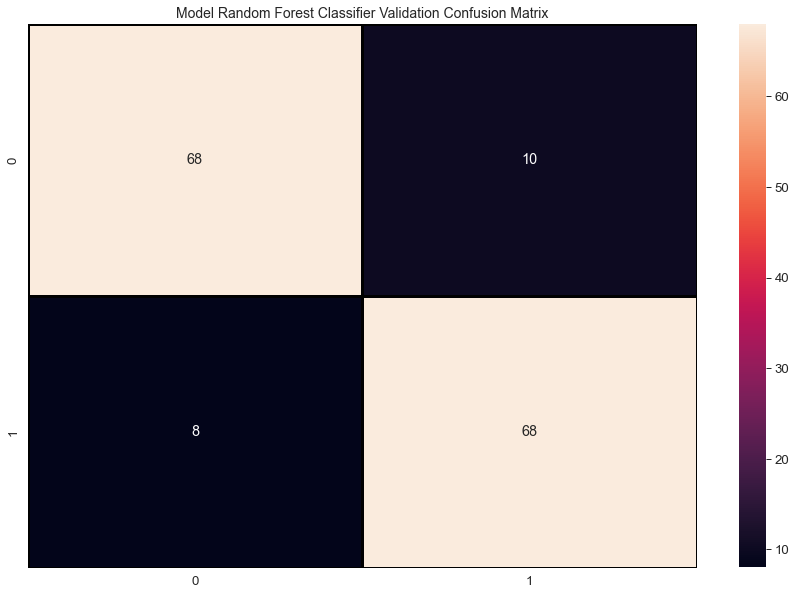

In [207]:
print('Model Random Forest Classifier Validation Classification Report:\n ', classification_report(y_test, rf_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, rf_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Random Forest Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Gradient Boosting Classifier

Model Gradient Boosting Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.883     0.872     0.877        78
           1      0.870     0.882     0.876        76

    accuracy                          0.877       154
   macro avg      0.877     0.877     0.877       154
weighted avg      0.877     0.877     0.877       154



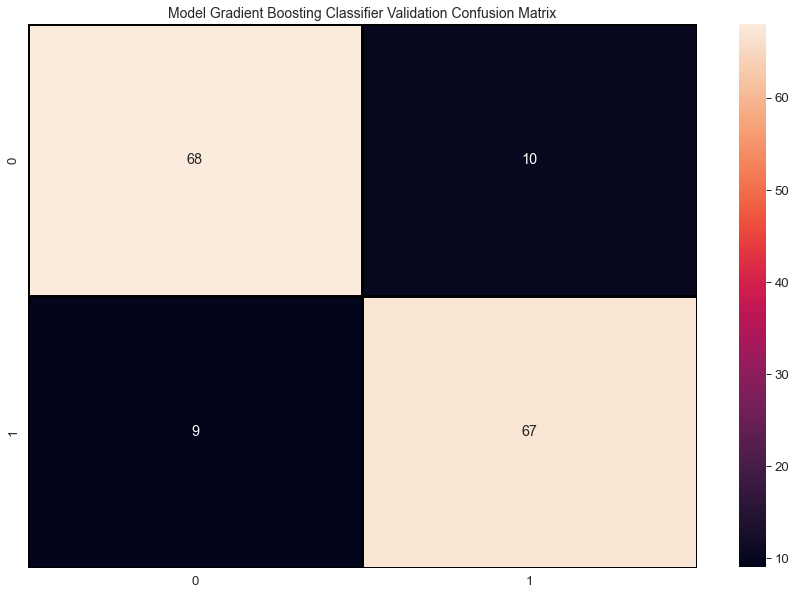

In [208]:
print('Model Gradient Boosting Classifier Validation Classification Report:\n ', classification_report(y_test, gb_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, gb_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Gradient Boosting Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Histogram-based Gradient Boosting Classification Tree

Model Histogram-based Gradient Boosting Classification Tree Validation Classification Report:
                precision    recall  f1-score   support

           0      0.866     0.910     0.888        78
           1      0.903     0.855     0.878        76

    accuracy                          0.883       154
   macro avg      0.884     0.883     0.883       154
weighted avg      0.884     0.883     0.883       154



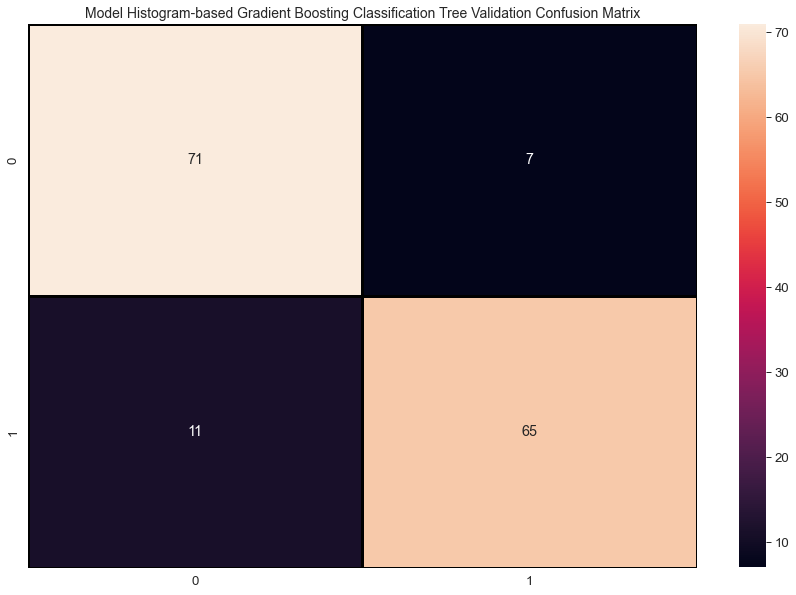

In [209]:
print('Model Histogram-based Gradient Boosting Classification Tree Validation Classification Report:\n ', classification_report(y_test, hgb_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, hgb_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Histogram-based Gradient Boosting Classification Tree Validation Confusion Matrix",fontsize=14)
plt.show()

#### AdaBoost Classifier

Model AdaBoost Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.868     0.846     0.857        78
           1      0.846     0.868     0.857        76

    accuracy                          0.857       154
   macro avg      0.857     0.857     0.857       154
weighted avg      0.857     0.857     0.857       154



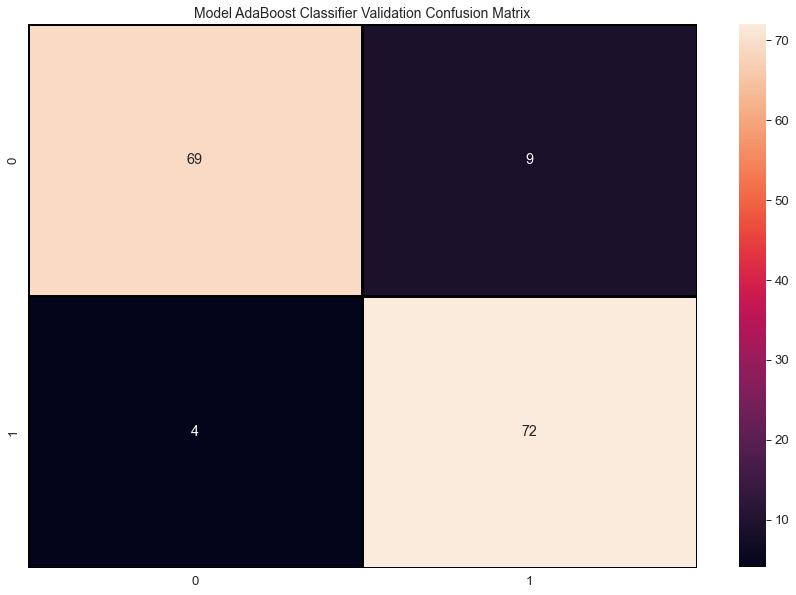

In [210]:
print('Model AdaBoost Classifier Validation Classification Report:\n ', classification_report(y_test, ad_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, ad_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model AdaBoost Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Extra Trees Classifier

Model Extra Trees Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.971     0.872     0.919        78
           1      0.881     0.974     0.925        76

    accuracy                          0.922       154
   macro avg      0.926     0.923     0.922       154
weighted avg      0.927     0.922     0.922       154



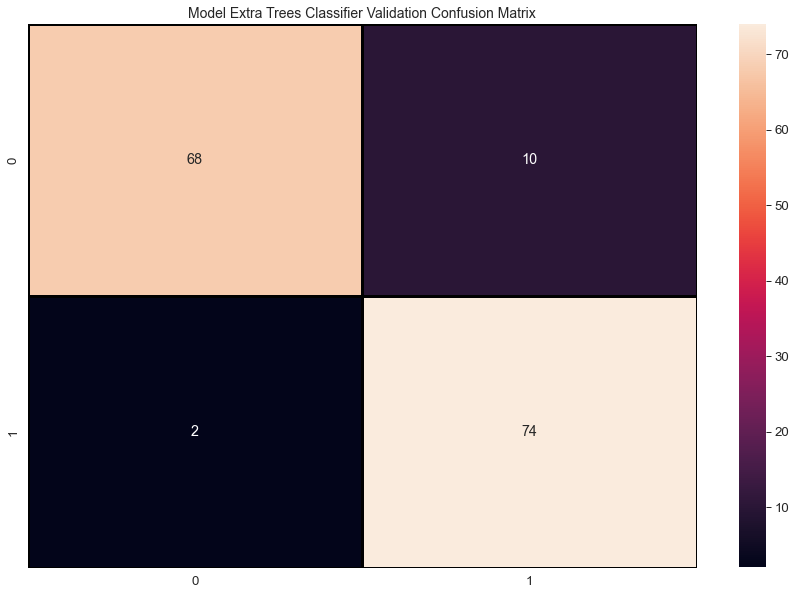

In [211]:
print('Model Extra Trees Classifier Validation Classification Report:\n ', classification_report(y_test, et_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, et_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Extra Trees Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### K Neighbors Classifier

Model K Neighbors Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.838     0.859     0.848        78
           1      0.851     0.829     0.840        76

    accuracy                          0.844       154
   macro avg      0.844     0.844     0.844       154
weighted avg      0.844     0.844     0.844       154



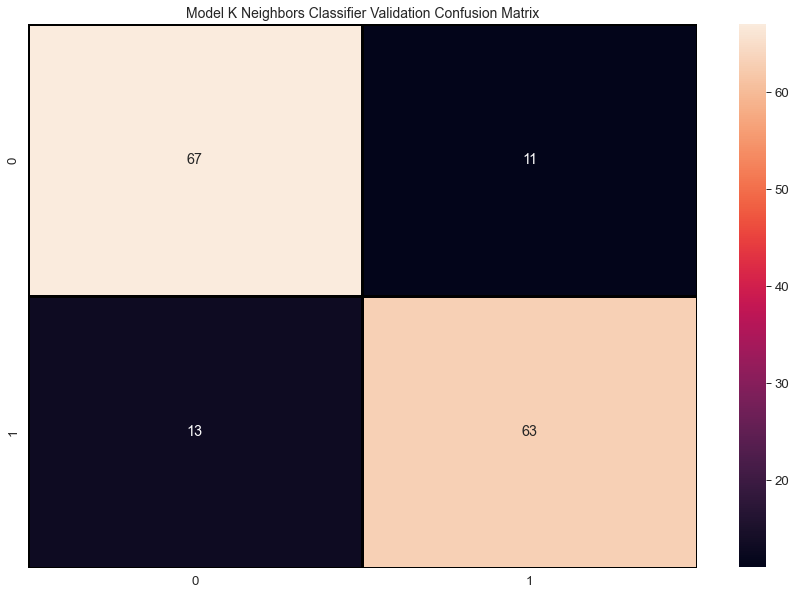

In [212]:
print('Model K Neighbors Classifier Validation Classification Report:\n ', classification_report(y_test, knn_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, knn_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model K Neighbors Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Decision Tree Classifier

Model Decision Tree Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.767     0.885     0.821        78
           1      0.859     0.724     0.786        76

    accuracy                          0.805       154
   macro avg      0.813     0.804     0.804       154
weighted avg      0.812     0.805     0.804       154



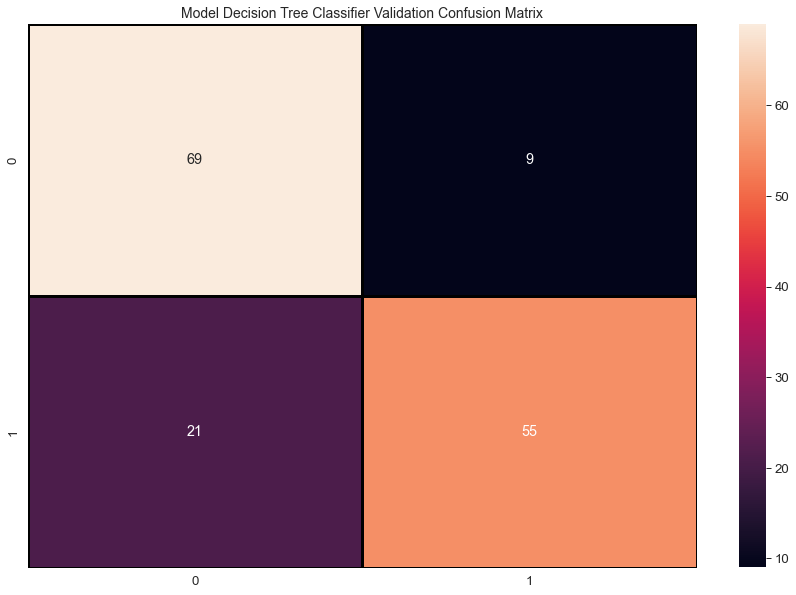

In [213]:
print('Model Decision Tree Classifier Validation Classification Report:\n ', classification_report(y_test, dt_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, dt_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Model Decision Tree Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Logistic Regression Classifier

Model Logistic Regression Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.972     0.885     0.926        78
           1      0.892     0.974     0.931        76

    accuracy                          0.929       154
   macro avg      0.932     0.929     0.928       154
weighted avg      0.932     0.929     0.928       154



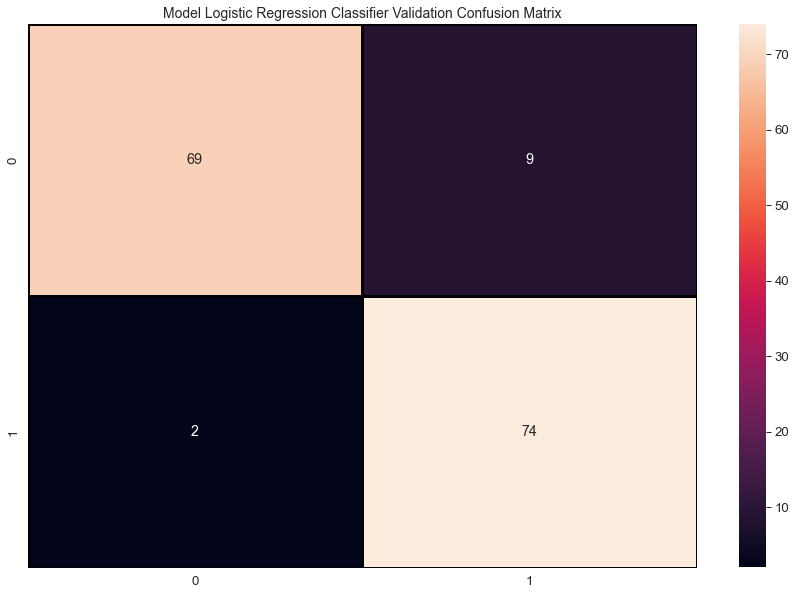

In [214]:
print('Model Logistic Regression Classifier Validation Classification Report:\n ', classification_report(y_test, lg_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lg_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Logistic Regression Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Logistic Regression CV Classifier

Model Logistic Regression CV Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.931     0.859     0.893        78
           1      0.866     0.934     0.899        76

    accuracy                          0.896       154
   macro avg      0.898     0.897     0.896       154
weighted avg      0.899     0.896     0.896       154



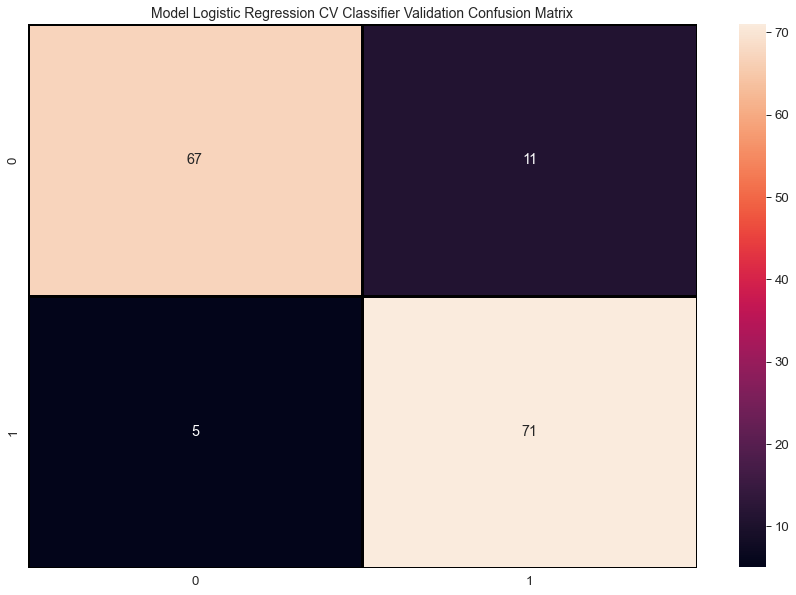

In [215]:
print('Model Logistic Regression CV Classifier Validation Classification Report:\n ', classification_report(y_test, lgcv_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lgcv_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Logistic Regression CV Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Stochastic Gradient Descent Classifier

Model Stochastic Gradient Descent Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      1.000     0.808     0.894        78
           1      0.835     1.000     0.910        76

    accuracy                          0.903       154
   macro avg      0.918     0.904     0.902       154
weighted avg      0.919     0.903     0.902       154



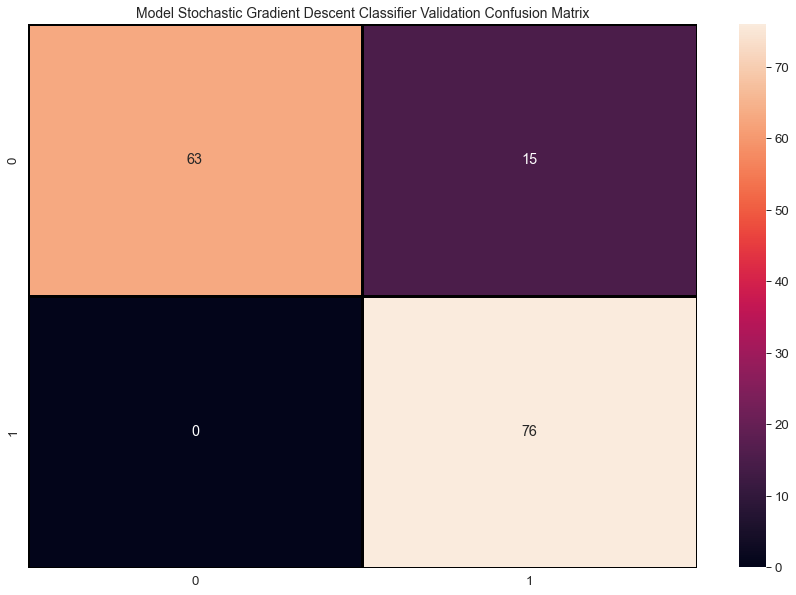

In [216]:
print('Model Stochastic Gradient Descent Classifier Validation Classification Report:\n ', classification_report(y_test, sgdc_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, sgdc_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Stochastic Gradient Descent Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

###### Linear Perceptron Classifier

Model Linear Perceptron Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.926     0.808     0.863        78
           1      0.826     0.934     0.877        76

    accuracy                          0.870       154
   macro avg      0.876     0.871     0.870       154
weighted avg      0.877     0.870     0.870       154



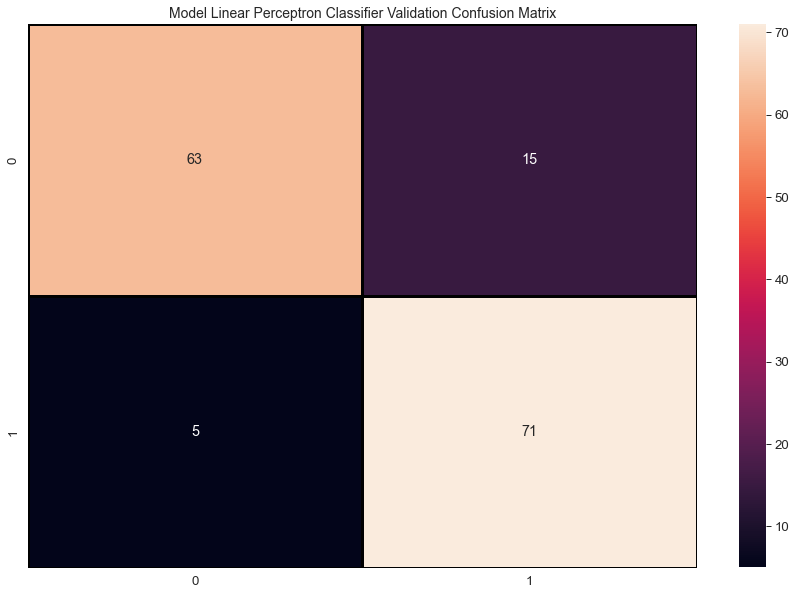

In [217]:
print('Model Linear Perceptron Classifier Validation Classification Report:\n ', classification_report(y_test, lpc_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lpc_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Linear Perceptron Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Support Vector Machines Classifier

Model Support Vector Machines Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.817     0.744     0.779        78
           1      0.759     0.829     0.792        76

    accuracy                          0.786       154
   macro avg      0.788     0.786     0.785       154
weighted avg      0.788     0.786     0.785       154



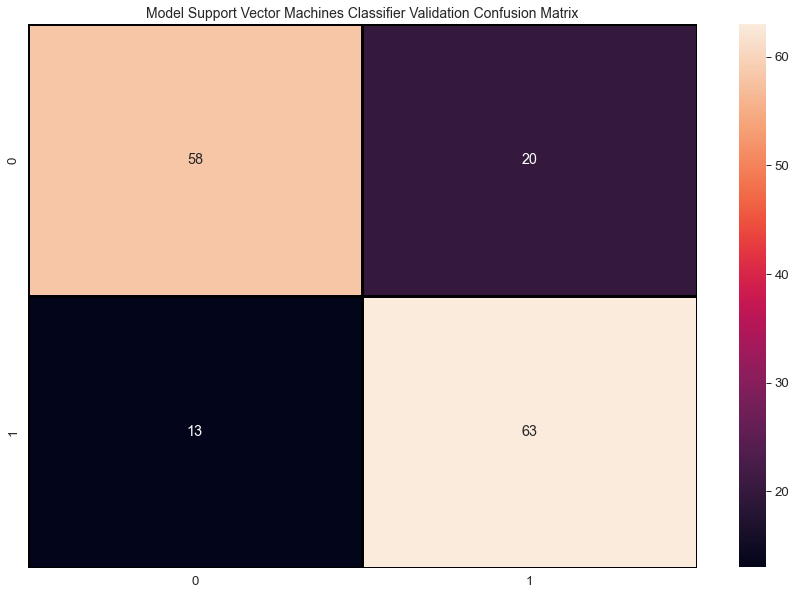

In [218]:
print('Model Support Vector Machines Classifier Validation Classification Report:\n ', classification_report(y_test, svm_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, svm_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Model Support Vector Machines Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Linear Support Vector Classification

Model Linear Support Vector Classificationr Validation Classification Report:
                precision    recall  f1-score   support

           0      1.000     0.808     0.894        78
           1      0.835     1.000     0.910        76

    accuracy                          0.903       154
   macro avg      0.918     0.904     0.902       154
weighted avg      0.919     0.903     0.902       154



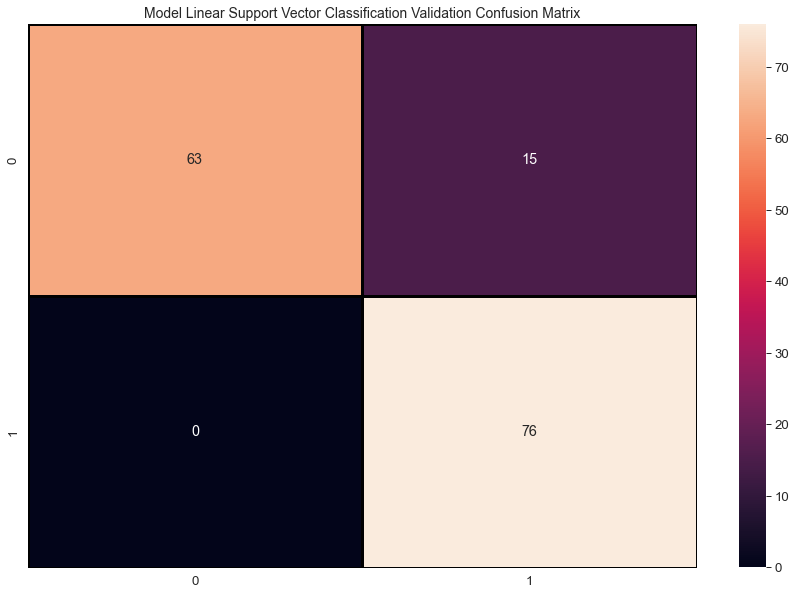

In [219]:
print('Model Linear Support Vector Classificationr Validation Classification Report:\n ', classification_report(y_test, lsvm_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lsvm_op_m_1_pred_vaild_cpu),
               annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Model Linear Support Vector Classification Validation Confusion Matrix",fontsize=14)
plt.show()

# 16. Accuracy Score Summary  

## Standered Machien Learning Models 

### Predication Using CPU

In [220]:
print(tabulate(cpu_ml_m_1_valid_compare.sort_values(by="Standered CPU Models Accuracy", ascending=False), headers = 'keys', tablefmt = 'psql'))

+----+-------------------------------------------------------+---------------------------------+
|    | Standered CPU Models                                  |   Standered CPU Models Accuracy |
|----+-------------------------------------------------------+---------------------------------|
|  9 | Logistic Regression Classifier                        |                        0.909091 |
| 15 | Linear Support Vector Classification                  |                        0.902597 |
| 10 | Logistic Regression CV Classifier                     |                        0.902597 |
| 14 | Support Vector Machines Classifiers                   |                        0.896104 |
|  7 | Naive Bayes Classifier for Multivariate Bernoulli     |                        0.88961  |
|  0 | Random Forest Classifier                              |                        0.876623 |
| 16 | Multilayer Perceptron Classifier                      |                        0.87013  |
|  5 | K Neighbors Classifier 

In [221]:
fig = px.bar(cpu_ml_m_1_valid_compare.sort_values(by="Standered CPU Models Accuracy", ascending=True), x = "Standered CPU Models Accuracy", y = "Standered CPU Models", title = "Model Machines Learning CPU Validation Accuracy")
fig.show()

## Machine Learning Optmization Models

### Predication Using CPU

In [222]:
print(tabulate(cpu_ml_op_m_1_valid_compare.sort_values(by="Optimization CPU Models Accuracy", ascending=False), headers = 'keys', tablefmt = 'psql'))

+----+-------------------------------------------------------+------------------------------------+
|    | Optimization CPU Models                               |   Optimization CPU Models Accuracy |
|----+-------------------------------------------------------+------------------------------------|
|  7 | Logistic Regression Classifier                        |                           0.928571 |
|  4 | Extra Trees Classifier                                |                           0.922078 |
|  3 | AdaBoost Classifier                                   |                           0.915584 |
|  9 | Stochastic Gradient Descent Classifier                |                           0.902597 |
| 12 | Linear Support Vector Classification                  |                           0.902597 |
|  8 | Logistic Regression CV Classifier                     |                           0.896104 |
|  0 | Random Forest Classifier                              |                           0.883117 |


In [223]:
fig = px.bar(cpu_ml_op_m_1_valid_compare.sort_values(by="Optimization CPU Models Accuracy", ascending=True), x = "Optimization CPU Models Accuracy", y = "Optimization CPU Models", title = "Model Machines Learning Optimization CPU Validation Accuracy")
fig.show()

## Compare the Machine Learning Models Accuracy 

In [224]:
cpu_ml_m_1_valid_compare = pd.DataFrame(cpu_ml_m_1_valid_compare) 

cpu_ml_op_m_1_valid_compare = pd.DataFrame(cpu_ml_op_m_1_valid_compare) 

All_ML_Accuracy_result = pd.concat([cpu_ml_m_1_valid_compare.set_index('Standered CPU Models'),
                                     cpu_ml_op_m_1_valid_compare.set_index('Optimization CPU Models')], axis=1)

All_ML_Accuracy_result = All_ML_Accuracy_result.sort_values(by="Standered CPU Models Accuracy", ascending=False)
pd.DataFrame(All_ML_Accuracy_result)

,Standered CPU Models Accuracy,Optimization CPU Models Accuracy
Logistic Regression Classifier,0.909,0.929
Linear Support Vector Classification,0.903,0.903
Logistic Regression CV Classifier,0.903,0.896
Support Vector Machines Classifiers,0.896,0.786
Naive Bayes Classifier for Multivariate Bernoulli,0.890,NaN
Random Forest Classifier,0.877,0.883
Multilayer Perceptron Classifier,0.870,NaN
K Neighbors Classifier,0.864,0.844
Linear Perceptron Classifier,0.864,0.870
Gradient Boosting Classifier,0.857,0.877
